### Download dataset from here
link: https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

## Step 1: Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Reading Dataset

In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### About Dataset:
- PassengerId: Unique id to each passenger
- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin: Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Observations:
- passengerid, name, ticket has no significance on target variable
- There are 3 classes in titanic 
- age has 177 and embarked has 2 and cabin has 687 missing values

## Step 3: Data Reduction

In [10]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [11]:
#since cabin has so many missing values, so we will drop it
#df.drop(["Cabin"],axis=1,inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [14]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


## Step 4: Numerical and categorical columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [16]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are ",num_cols)

Categorical Variables are  Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables are  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## Step 5: EDA Exploratory Data Analysis¶
Key Features of EDA:
1. Understanding the Data: EDA helps in understanding the structure, distribution, and characteristics of the dataset. It provides insight into the nature of the data, such as its range, variability, and central tendencies.
2. Identifying Patterns and Relationships: EDA techniques allow for the identification of patterns, trends, and relationships within the data. This includes discovering correlations between variables, detecting outliers, and uncovering hidden patterns that may not be immediately apparent.
3. Generating Hypotheses: EDA often leads to the generation of hypotheses or research questions. By exploring the data visually and quantitatively, analysts can formulate hypotheses about the underlying factors driving observed patterns in the data.
4. Feature Selection: EDA helps in identifying important features or variables that are relevant for modeling or analysis. By examining the relationships between variables and their associations with the target variable, analysts can determine which features are most informative for predictive modeling or further analysis.
5. Data Cleaning and Preprocessing: EDA helps in detecting and addressing data quality issues such as missing values, outliers, and inconsistencies. By identifying problematic data points early in the analysis process, analysts can take appropriate steps to clean and preprocess the data, ensuring the accuracy and reliability of subsequent analyses.
6. Communicating Results: EDA provides visualizations and summaries that facilitate communication of results to stakeholders. Visualizations such as charts, graphs, and summary statistics make it easier to convey complex findings and insights in a clear and understandable manner.
7. Informing Decision-Making: EDA helps in making informed decisions by providing insights into the data that can guide subsequent analysis, modeling, and decision-making processes. By understanding the underlying structure of the data, analysts can make more accurate predictions and formulate effective strategies

In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### 5.1) Univariate Analysis
- Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

- Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Survived


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


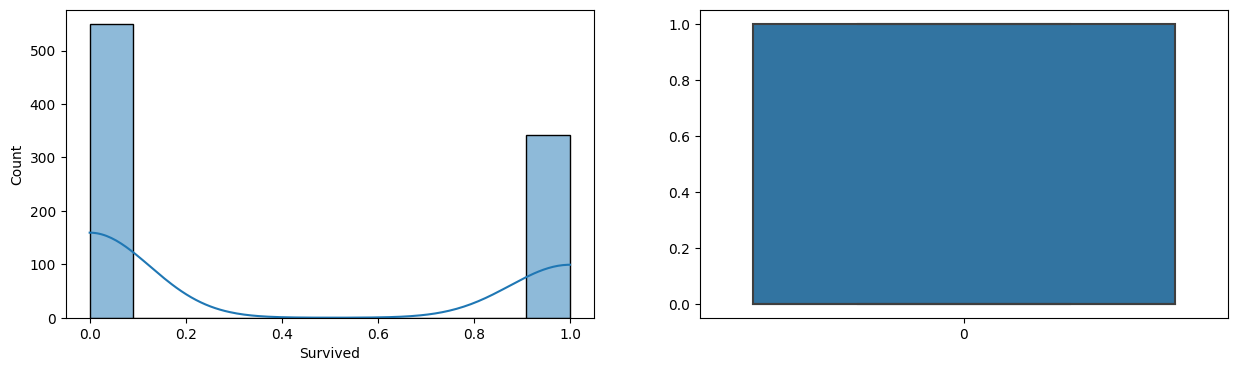

Pclass


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


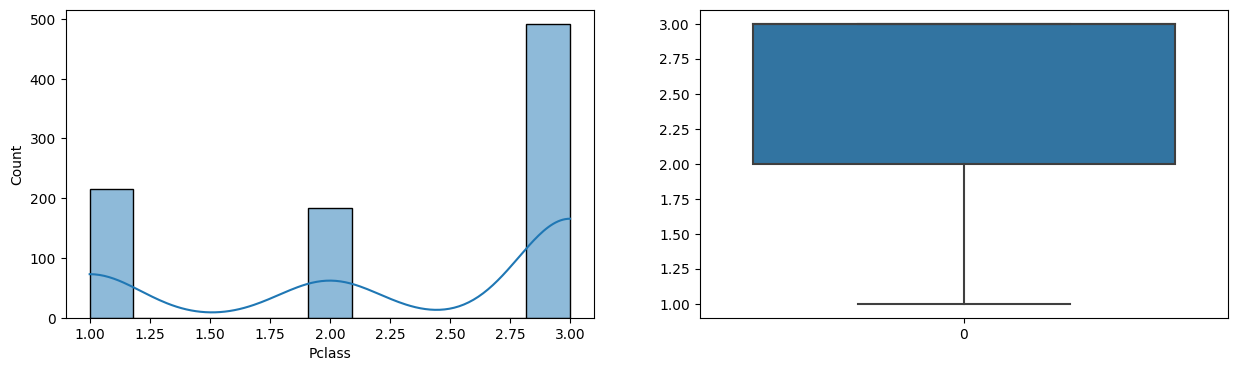

Age


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


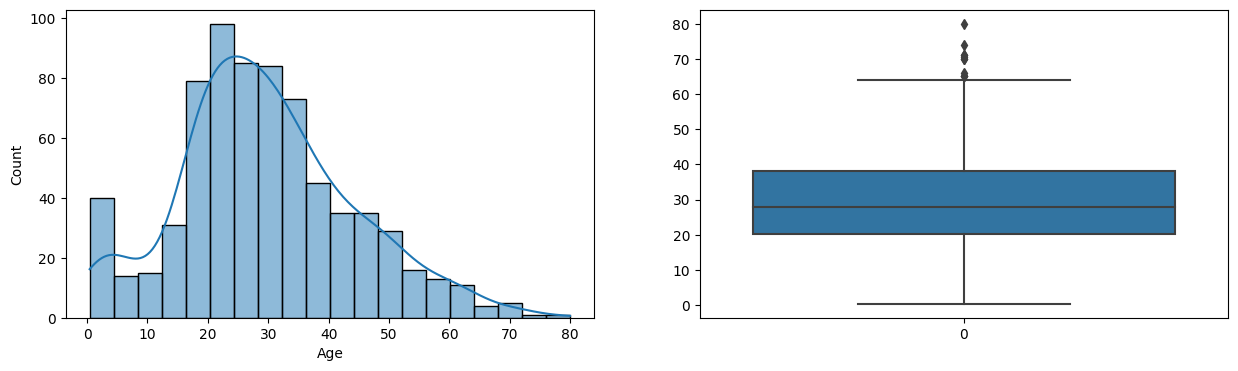

SibSp


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


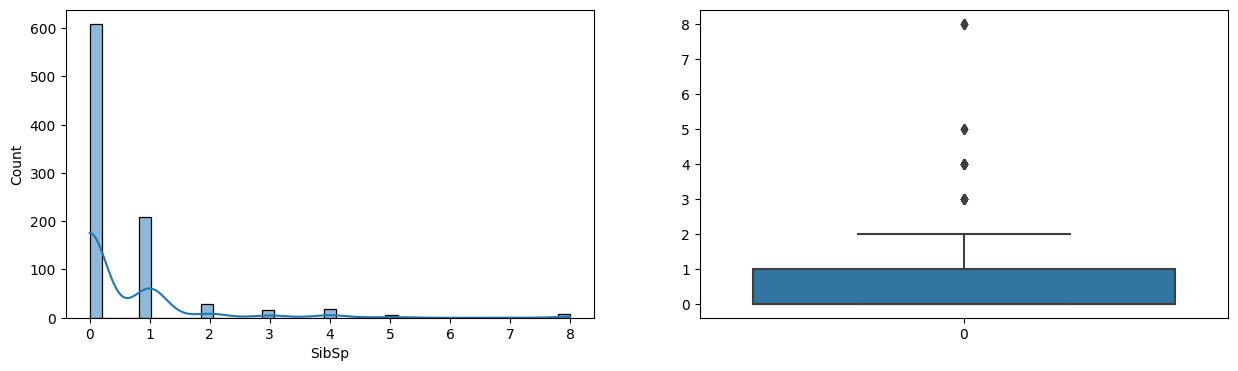

Parch


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


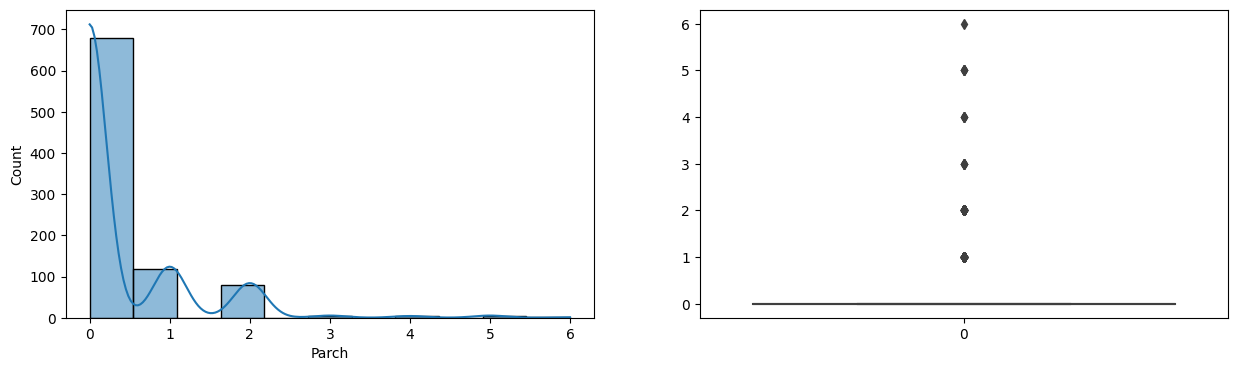

Fare


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


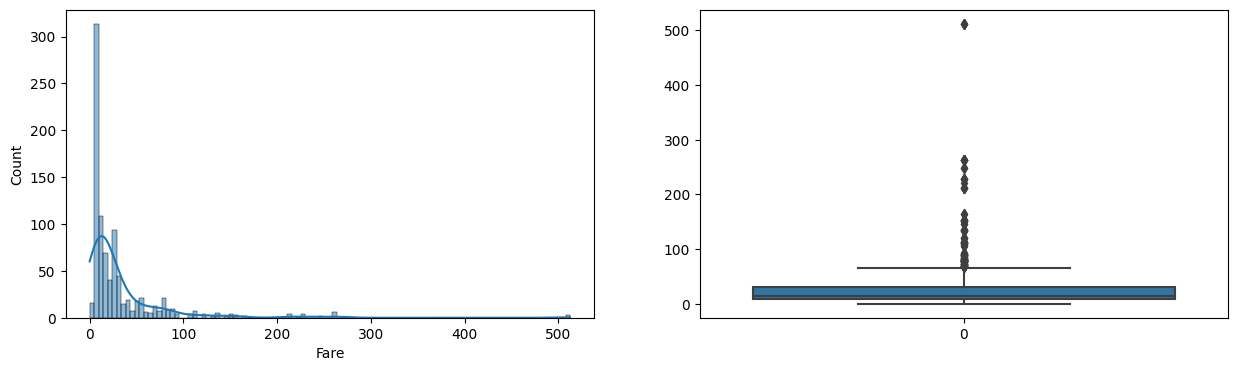

In [18]:
# brahamstra for univariate analysis for numerical columns
for col in num_cols:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

#### Observations:
- Most people failed to survive in titanic
- Most people are travelling from 3rd class
- Most people age range vary from 20-40 and very few people are above 65
- Most people are travelling with no sibiling and spouse
- most people have no parent n children
- some outliers are present in fare

Sex


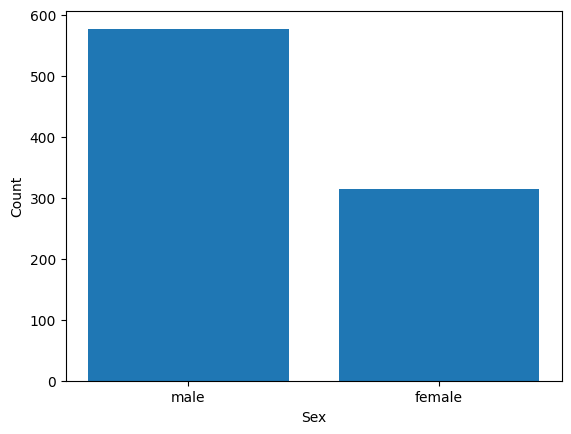

Cabin


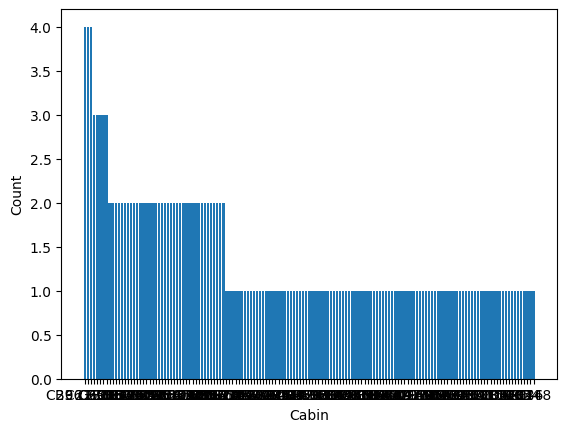

Embarked


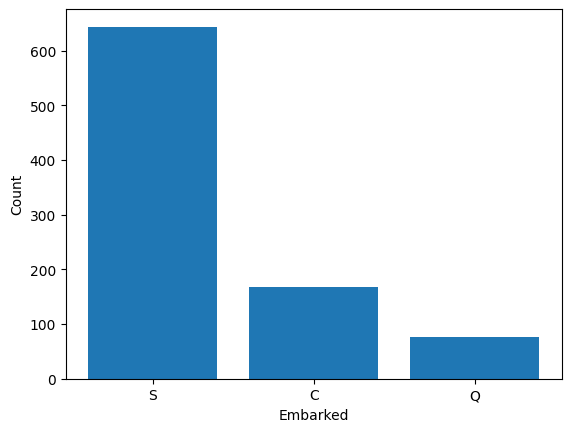

In [19]:
# For categorical columns
for col in cat_cols:
    print(col)
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#### Observations:
- People travelling in titanic are mostly male
- Most people embarked from southampton

### 5.2) BiVariate Analysis
- Countplot of each column against target variable 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

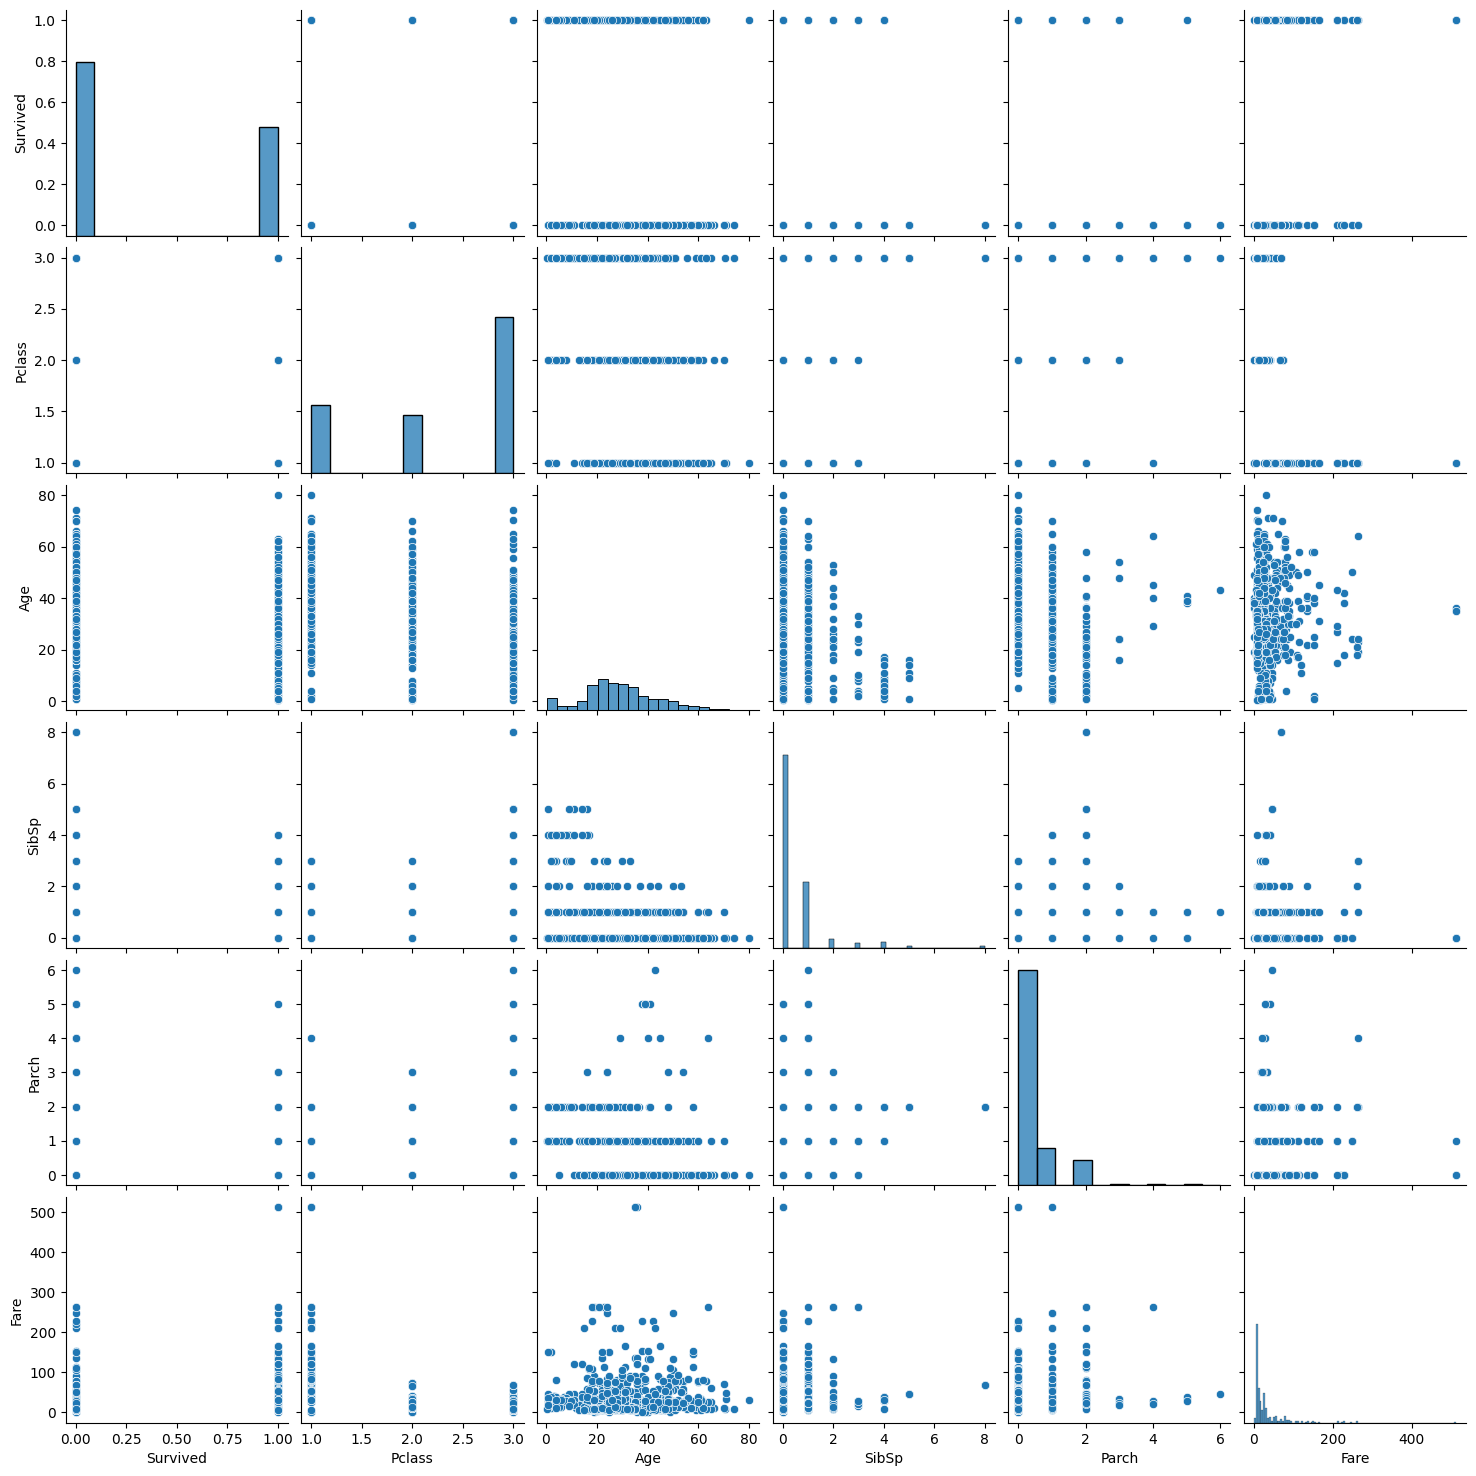

In [20]:
sns.pairplot(df)
plt.show()

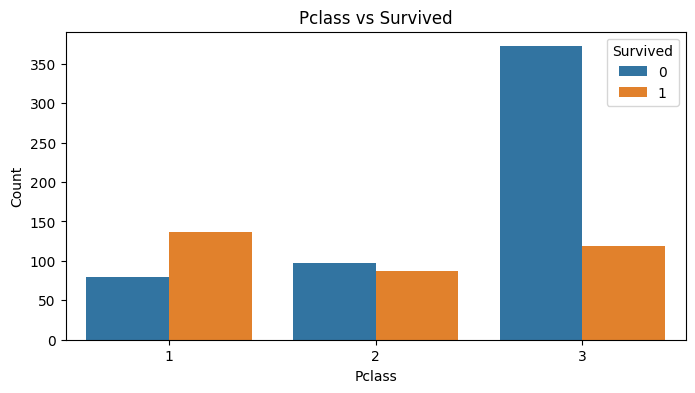

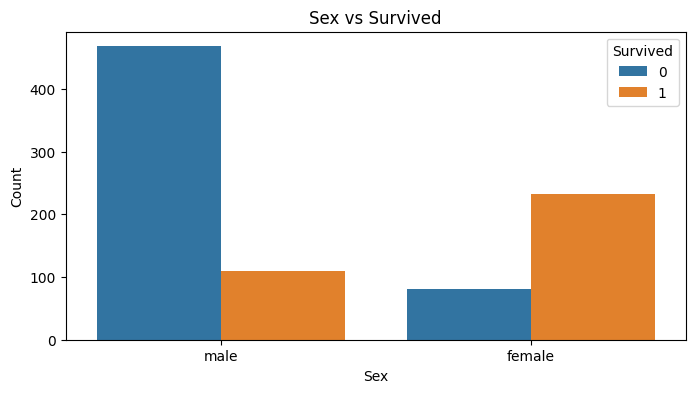

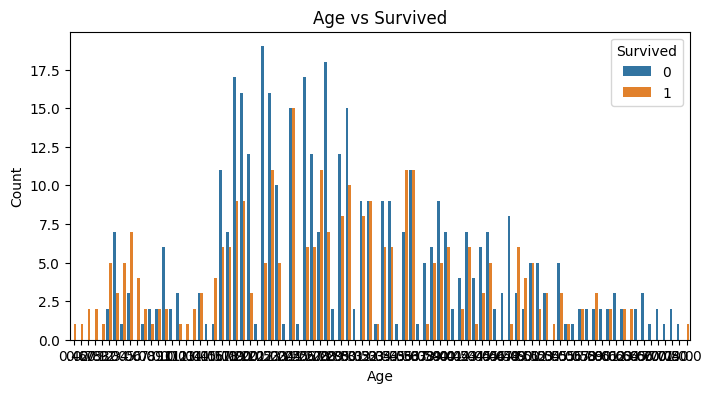

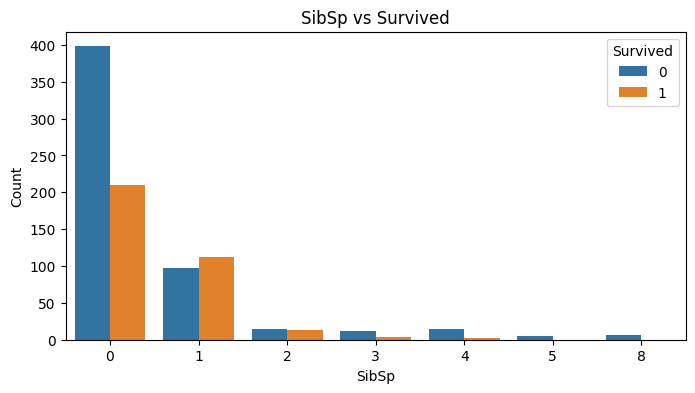

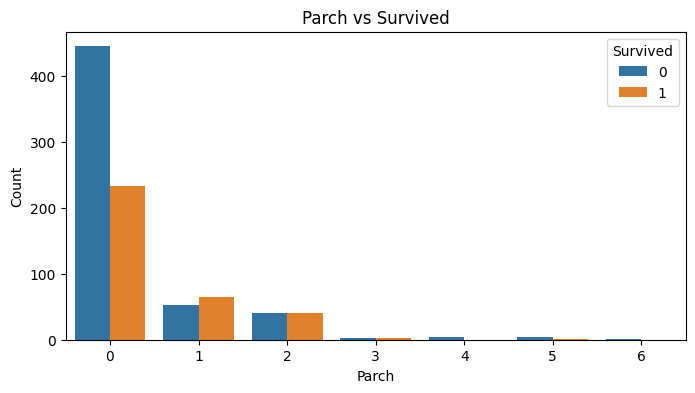

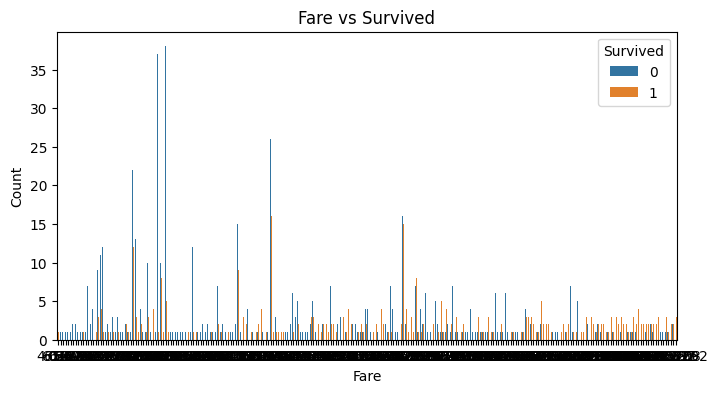

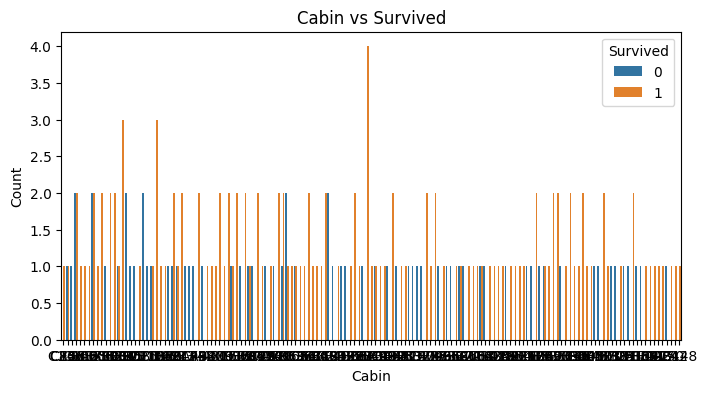

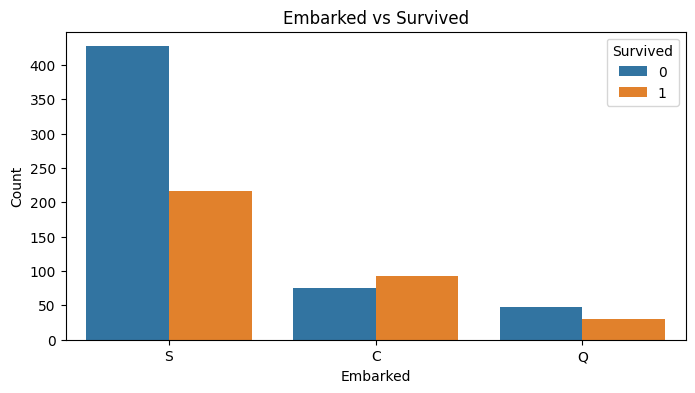

In [21]:
for col in df.columns:
    if col != "Survived":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue="Survived", data=df)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs Survived")
        plt.show()

#### Observations:
- Most 1st class people survived while 3rd class people died
- Most male died while most females survived
- Those having 1 sibiling or spouse has more chance of surviving 
- Those having 1 parent or child has more chance of surviving
- Those who embarked from Cherbourg has great chance of survining

### 5.3) Multivariate Analysis

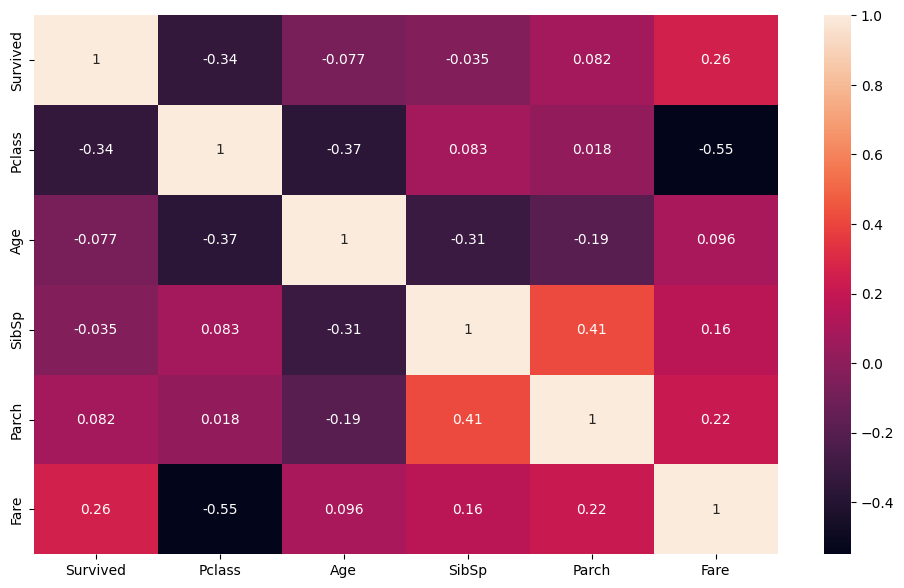

In [22]:
df1=df.select_dtypes(exclude=['object'])
plt.figure(figsize=(12, 7))
sns.heatmap(df1.corr(),annot=True)
plt.show()

#### Observations:
- Survival depends mostly on Pclass and Fare only
- 1st class has large Fare 

## Step 6- Feature Engineering
Feature engineering is a machine learning technique that involves extracting and transforming raw data into features that can be used for training and prediction. The goal of feature engineering is to: Improve model accuracy, Simplify and speed up data transformations, and Design and train new machine learning features

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [24]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 6.1) Handling Missing Values
### Types of Missing Values:
There are mainly three types of missing values- MCAR, MNAR and MAR.

1. ##### MCAR (Missing Completly At Random):
A variable is missing completely at random if the probability of being missing is the same for all the observations.
When data is MCAR, which Means there is absolutely no relationship between the data missing and any other observed or missing value in the dataset.
In other words, those missing data points are a random subset of the dataset.

2. ##### MNAR (Missing Data Not At Random):
As the name suggests their will be some relationship between the data missing and any other value in the dataset.

3. ##### MAR(Missing At Random):
Missing at Random means, the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data

#### Why Handle Missing Values ?
- Many machine learning algorithms faild to perform on the dataset if it contains missing values. However there are some algorithms that works even with missing values like K-nearest neighbours and Naive Bayes.
- You may end up building a biased model that will lead to incorrect results.
- Missing values reduces accuracy of the model.
- Missing values can lead to less precision.

In [25]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
#Missing Values Percentage
round((df.isna().sum() / len(df))*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

### How To Handle Missing Values?
There are two ways to handle missing values-
- Dropping Missing Values
- Imputing Missing Values With Some Other Value (Preferred)

1. #### Dropping Missing Values
- if missing values is of type Missing At Random(MAR) or Missing Completly At Random(MCAR) then it can be deleted.
- One of the biggest disadvantage of dropping missing values is one might end up deleting some useful data as well with missing values.

There are two ways to remove missing values
- Deleting the entire row containing missing values
- Deleting the entire column containing missing values

#### 1. Deleting the entire row

In [27]:
df1 = df.copy()
df1 = df1.dropna(axis=0)
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [28]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S


In [29]:
print('Dataset Size With Missing Values',df.shape)
print('Dataset Size Without Missing Values',df1.shape)

Dataset Size With Missing Values (891, 9)
Dataset Size Without Missing Values (183, 9)


There is a big loss of data, because Cabin column contains more than 75% missing values.
#### 2. Deleting The Entire Column

In [30]:
## Copy of data
df2 = df.copy()
df2 = df2.drop(['Cabin','Age','Embarked'],axis=1) 
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [31]:
df2

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000
887,1,1,female,0,0,30.0000
888,0,3,female,1,2,23.4500
889,1,1,male,0,0,30.0000


#### Conclusion:
- Although We Have Removed Missing Values, But With Them a big part of data is also lost. Like Age is a very important column for survival of a person.

- Deleting Missing Values From The Dataset Is Only An Option if we have less than 10% of missing values on a big dataset.

- The Best and Evergreen option is to Impute missing values with some other similar value.

### 2. Imputing Missing Values
#### METHOD 1 → Mean Value Imputation
In this technique we replace missing values with the mean value of the column containing missing values

C:\Users\Sarthak Aggarwal\AppData\Local\Temp\ipykernel_13060\182017004.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

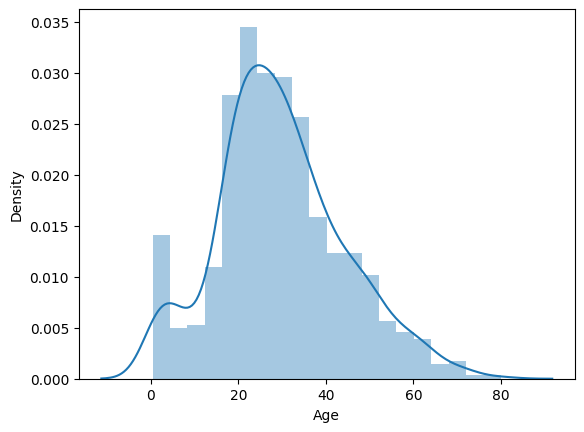

In [32]:
## First Step : Check The Distribution
sns.distplot(df.Age)

In [33]:
def impute_nan_mean(df,column,mean):
    df[column+'_mean'] = df[column].fillna(mean)
    return df

mean_val = df.Age.mean()
df_mean = impute_nan_mean(df,'Age',mean_val)

In [34]:
df_mean[df_mean.Age.isna()][['Age','Age_mean']]

,Age,Age_mean
5,NaN,29.699118
17,NaN,29.699118
19,NaN,29.699118
26,NaN,29.699118
28,NaN,29.699118
...,...,...
859,NaN,29.699118
863,NaN,29.699118
868,NaN,29.699118
878,NaN,29.699118


In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_mean
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000


Mean Imputation is a great choice, if distribution is normal or close to normal.

In case of skewed distribution we shoud go with meadian value.

#### METHOD 2: Median Value Imputation
In this technique we replace all the missing value with median value of the column

In [36]:
## Imputing missing value with median value of the column
def impute_nan_median(df,column,median):
    df[column+'_median'] = df[column].fillna(median)
    return df

median_val = df.Age.median()
df_med = impute_nan_median(df,'Age',median_val)

In [37]:
df_med[df_med.Age.isna()][['Age','Age_median']]

,Age,Age_median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
...,...,...
859,NaN,28.0
863,NaN,28.0
868,NaN,28.0
878,NaN,28.0


### METHOD 3: Mode Imputation (Frequent Category Imputation)
Mode value imputation is mostly used for categorical data. it can also be used for numerical variables as well.

- In this technique we replace all the missing values with the most frequent value of the column.

In [38]:
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = df.Age.mode()
df_mode = impute_nan_mode(df,'Age',mode_val)

In [39]:
df_mode[df_mode.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,NaN
17,NaN,NaN
19,NaN,NaN
26,NaN,NaN
28,NaN,NaN
...,...,...
859,NaN,NaN
863,NaN,NaN
868,NaN,NaN
878,NaN,NaN


you see how most NAN values gets replaced with NAN values because the most frequent value of this numerical column is NAN. To use mode here we need to ignore all the NAN values and then apply mode on remaining values.

In [40]:
df[df.Age.notna()]['Age'].mode()[0]

24.0

In [41]:
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = df[df.Age.notna()]['Age'].mode()[0]    ## find mode of all the non missing values of Age column
df_mode = impute_nan_mode(df,'Age',mode_val)

In [42]:
df_mode[df_mode.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,24.0
17,NaN,24.0
19,NaN,24.0
26,NaN,24.0
28,NaN,24.0
...,...,...
859,NaN,24.0
863,NaN,24.0
868,NaN,24.0
878,NaN,24.0


Although the above code worked but you should never use mode for a numerical column until there is some exception.

Mode works better for categorical data with less categories.

- One of the biggest advantage of using mode as categorical data imputer is that we don't need to convert categories into numerical data.

Let's use it to fill missing values in Embarked Column.

In [43]:
df.Embarked.isna().sum()

2

In [44]:
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [45]:
#### STEP 1: Find Mode Values
mode_cat_embarked = df.Embarked.mode()[0]

#### STEP 2: Fill Missing Values With Most Frequent Category
df['Embarked_mode'] = df['Embarked'].fillna(mode_cat_embarked)

#### Check For Results
df['Embarked_mode'].isna().sum()

0

In [46]:
mode_cat_embarked

'S'

In [47]:
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Cabin            687
Embarked           2
Age_mean           0
Age_median         0
Age_mode           0
Embarked_mode      0
dtype: int64

In [48]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_mean,Age_median,Age_mode,Embarked_mode
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000,22.0,22.0,S
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000,38.0,38.0,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000,26.0,26.0,S
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000,35.0,35.0,S
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000,35.0,35.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000,27.0,27.0,S
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000,19.0,19.0,S
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118,28.0,24.0,S
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000,26.0,26.0,C


#### METHOD 4: Random Sample Imputation
In this method we will replace all the missing values with a random sample from the data.

In [49]:
### STEP 1: Generating Random Sample
sample = df.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
df['Age'+'_random_sample'] = df['Age'].fillna(sample)

df[df['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,30.0
17,NaN,30.0
19,NaN,30.0
26,NaN,30.0
28,NaN,30.0
...,...,...
859,NaN,30.0
863,NaN,30.0
868,NaN,30.0
878,NaN,30.0


In [50]:
### STEP 1: Generating Random Sample
sample = df.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
df['Age'+'_random_sample'] = df['Age'].fillna(sample)

df[df['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,33.0
17,NaN,33.0
19,NaN,33.0
26,NaN,33.0
28,NaN,33.0
...,...,...
859,NaN,33.0
863,NaN,33.0
868,NaN,33.0
878,NaN,33.0


You see everytime we run the codeblock we get a new random sample value.

To avoid this we can make use of np.seed()

- Note: There are chances that our random sample will pick nan as a sample, to avoid this we can use the same method we have used in mode.

In [51]:
np.random.seed(40)
### STEP 1: Generating Random Sample
sample = df.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
df['Age'+'_random_sample'] = df['Age'].fillna(sample)

df[df['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,25.0
17,NaN,25.0
19,NaN,25.0
26,NaN,25.0
28,NaN,25.0
...,...,...
859,NaN,25.0
863,NaN,25.0
868,NaN,25.0
878,NaN,25.0


no matter how many time we run the above codeblock the value will remain same, until whole execution resets.

#### METHOD 5: End of Distribution
If Missing Value is not at random then we can use this method. In this we replace all the missing values with 3rd std deviation value

<Axes: xlabel='Age'>

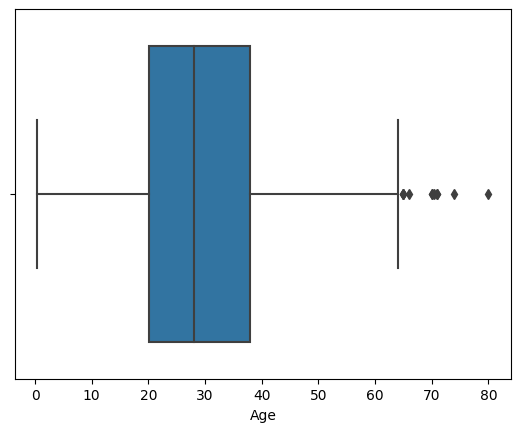

In [52]:
sns.boxplot(x = 'Age',data=df)

In [53]:
### STEP 1: Find Extreme Value
extreme = df.Age.mean() + 3*df.Age.std()

### STEP 2: Fill nan with extreme value
df['Age_end_distribution']  = df['Age'].fillna(extreme)

df
df[df['Age'].isna()][['Age','Age_end_distribution']]

,Age,Age_end_distribution
5,NaN,73.27861
17,NaN,73.27861
19,NaN,73.27861
26,NaN,73.27861
28,NaN,73.27861
...,...,...
859,NaN,73.27861
863,NaN,73.27861
868,NaN,73.27861
878,NaN,73.27861


we can also use a least value based on our data distribution.

In all above methods we are replacing missing values with some other value from the sample.
What if missing values are not at random?

What if you are required to showcase the importance of missing values?

In all above and similar cases we can use Arbitrary Value Imputation.

#### METHOD 6.1: Arbitrary Value Imputation (Numerical)
In this method we replace missing value with lowest or highest value of the distribution. (-infinity, +infinity)

In case of Age we can replace missing values either with 0 or 100.(least and highest)

- This method not only fill missing values but also captures the importance of it.

In [54]:
### Filling Values using 0
df['Age_0'] = df['Age'].fillna(0)

### Filling Values using 100
df['Age_100'] = df['Age'].fillna(100)

df[df.Age.isna()][['Age','Age_0','Age_100']]

,Age,Age_0,Age_100
5,NaN,0.0,100.0
17,NaN,0.0,100.0
19,NaN,0.0,100.0
26,NaN,0.0,100.0
28,NaN,0.0,100.0
...,...,...,...
859,NaN,0.0,100.0
863,NaN,0.0,100.0
868,NaN,0.0,100.0
878,NaN,0.0,100.0


#### METHOD 6.2: Arbitrary Value Imputation (Categorical)

In [55]:
df['Cabin_Missing'] = df['Cabin'].fillna('Missing')

In [56]:
df[df.Cabin.isna()][['Cabin','Cabin_Missing']]

,Cabin,Cabin_Missing
0,NaN,Missing
2,NaN,Missing
4,NaN,Missing
5,NaN,Missing
7,NaN,Missing
...,...,...
884,NaN,Missing
885,NaN,Missing
886,NaN,Missing
888,NaN,Missing


This method works fine but the only problem with this it it creates a new category Missing. If count of missing values is higher than other known categories than Missingcategory will impact the result more that will leads to an bad performing model.

To prevent this problem we can create a new feature containing information about missing values, where 1 will represent a missing value.

### METHOD 7: Capturing Missing Values with new feature.¶
It works well if the data are not missing completely at random.

In [57]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [58]:
### STEP 1: Creating a new feature
df['Cabin_nan']=np.where(df['Cabin'].isnull(),1,0)

In [59]:
df.iloc[:5][['Cabin','Cabin_nan']]

,Cabin,Cabin_nan
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


Once a new feature is added we can make use of any method to fill missing values.

In [60]:
df['Cabin'].mode()[0]

'B96 B98'

In [61]:
df['Cabin'].fillna(df['Cabin'].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

We can try same for numerical column Age as well.

In [62]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [63]:
df[['Age','Age_nan']]

,Age,Age_nan
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,NaN,1
889,26.0,0


All above methods we have discussed makes use of manual approach to find missing values and then fill using fillna. There are some advanced methods as well that makes use of machine learning models to predict missing values.

Let's see some of the most famous technique of predicting missing values using machine learning.

### METHOD 8: KNN Imputer
In this technique, we predict missing values using an algorithm that uses the values of nearby data points to impute, or predict, missing values. KNN stands for K-Nearest Neighbors, with K referring to the (user-defined) number of neighbors the algorithm will take into account.

KNN only works with numerical data. In some cases, however, non-numerical (e.g., categorical) data may be converted to numerical data for use with the KNN Imputer as well. We can also use the KNN Imputer with multiple features (or columns) at once.

In [64]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_mean,Age_median,Age_mode,Embarked_mode,Age_random_sample,Age_end_distribution,Age_0,Age_100,Cabin_Missing,Age_nan,Cabin_nan
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000,22.0,22.0,S,22.0,22.00000,22.0,22.0,Missing,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000,38.0,38.0,C,38.0,38.00000,38.0,38.0,C85,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000,26.0,26.0,S,26.0,26.00000,26.0,26.0,Missing,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000,35.0,35.0,S,35.0,35.00000,35.0,35.0,C123,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000,35.0,35.0,S,35.0,35.00000,35.0,35.0,Missing,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000,27.0,27.0,S,27.0,27.00000,27.0,27.0,Missing,0,1
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000,19.0,19.0,S,19.0,19.00000,19.0,19.0,B42,0,0
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118,28.0,24.0,S,25.0,73.27861,0.0,100.0,Missing,1,1
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000,26.0,26.0,C,26.0,26.00000,26.0,26.0,C148,0,0


We will study about it and Linear regression when we learn these algorithm

### Method 9: Imputation using Linear Regression
### Method 10: Imputation Using Multivariate Imputation by Chained Equation (MICE)

#### Let's Compare Each Method Imputations..........

In [65]:
df[df.Age.isna()][['Age','Age_mean','Age_median', 'Age_mode', 'Age_random_sample','Age_end_distribution', 'Age_0', 'Age_100']]

,Age,Age_mean,Age_median,Age_mode,Age_random_sample,Age_end_distribution,Age_0,Age_100
5,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
17,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
19,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
26,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
28,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
...,...,...,...,...,...,...,...,...
859,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
863,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
868,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
878,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0


Now, as we see all Methods of imputation, we will now handle missing values with best imputation

In [66]:
df.isnull().sum()

Survived                  0
Pclass                    0
Sex                       0
Age                     177
SibSp                     0
Parch                     0
Fare                      0
Cabin                   687
Embarked                  2
Age_mean                  0
Age_median                0
Age_mode                  0
Embarked_mode             0
Age_random_sample         0
Age_end_distribution      0
Age_0                     0
Age_100                   0
Cabin_Missing             0
Age_nan                   0
Cabin_nan                 0
dtype: int64

In [67]:
df.drop(["Age","Cabin","Embarked",'Age_median', 'Age_mode', 'Age_random_sample','Age_end_distribution', 'Age_0', 'Age_100',"Age_nan","Cabin_Missing"],axis=1,inplace=True)

In [68]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_mean,Embarked_mode,Cabin_nan
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [69]:
df.rename(columns={'Age_mean': 'Age', 'Embarked_mode': 'Embarked', 'Cabin_nan': 'Cabin'}, inplace=True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


## 6.2) Removing Outliers
An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects. Identifying outliers is important in statistics and data analysis because they can have a significant impact on the results of statistical analyses.
Outliers can skew the mean (average) and affect measures of central tendency, as well as influence the results of tests of statistical significance.

### i) Detecting and removing outlier using boxplot

A boxplot, also known as a box-and-whisker plot, provides a visual summary of the distribution of a dataset. It displays several descriptive statistics such as the median, quartiles, and potential outliers.

Here's what a boxplot typically tells us:
1. Median (Q2/50th Percentile): The middle value of the dataset. It represents the point where half of the data is below and half is above.
2. Quartiles (Q1, Q3): The dataset is divided into four equal parts. Q1 (lower quartile) is the value below which 25% of the data falls, and Q3 (upper quartile) is the value below which 75% of the data falls.
3. Interquartile Range (IQR): The range between the first and third quartiles (Q3 - Q1). It describes the middle 50% of the data.
4. Whiskers: Lines extending from the box that represent the range of the data, excluding outliers. The whiskers typically extend to 1.5 times the IQR from the quartiles.
5. Outliers: Data points that fall outside the whiskers. These points are typically plotted individually.
6. Box length: The length of the box represents the spread of the middle 50% of the data. A longer box indicates a larger spread.

By observing a boxplot, you can quickly grasp key aspects of the distribution of your data, such as its central tendency, spread, and presence of outliers. It's particularly useful for comparing distributions between different groups or datasets.

Survived


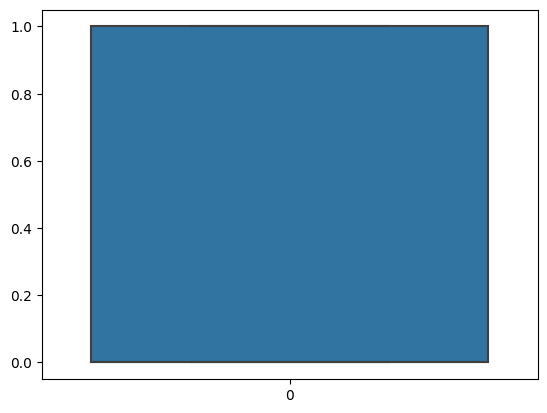

Pclass


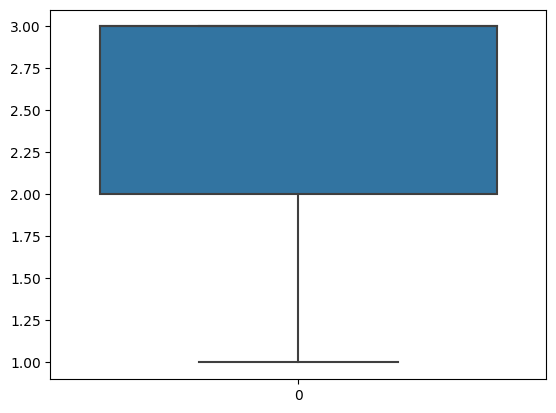

Age


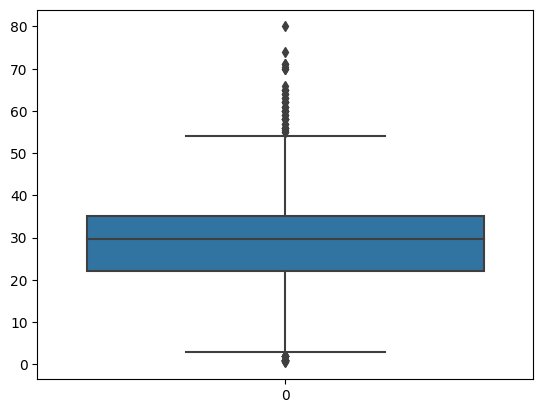

SibSp


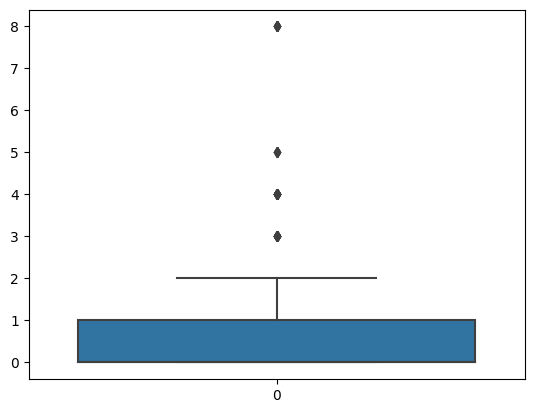

Parch


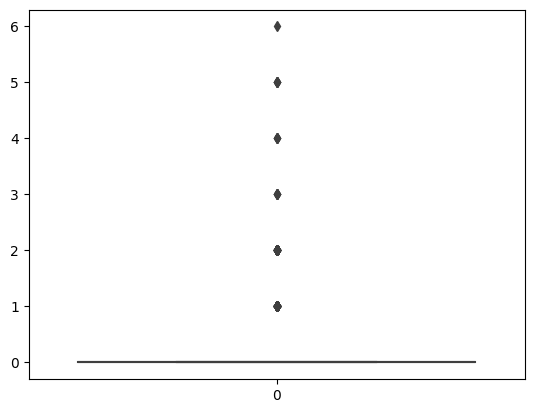

Fare


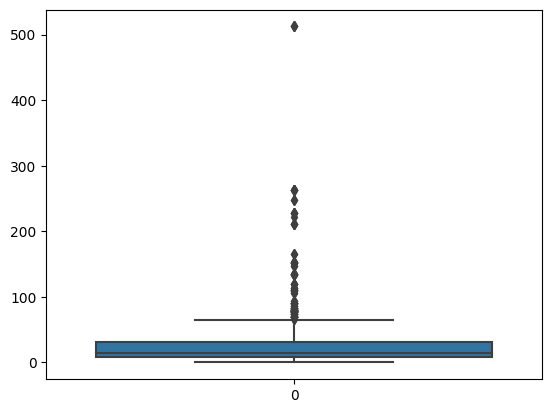

In [70]:
for col in num_cols:
    print(col)
    sns.boxplot(df[col])
    plt.show()

In [71]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

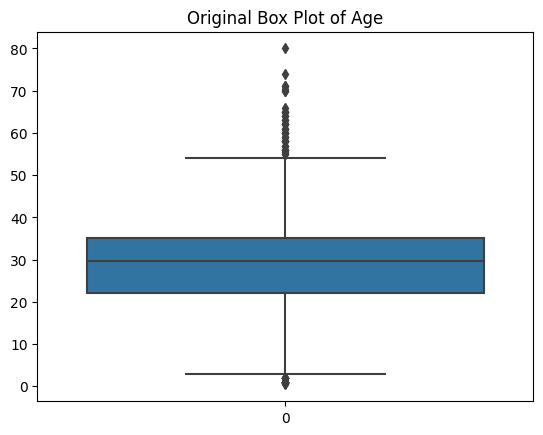

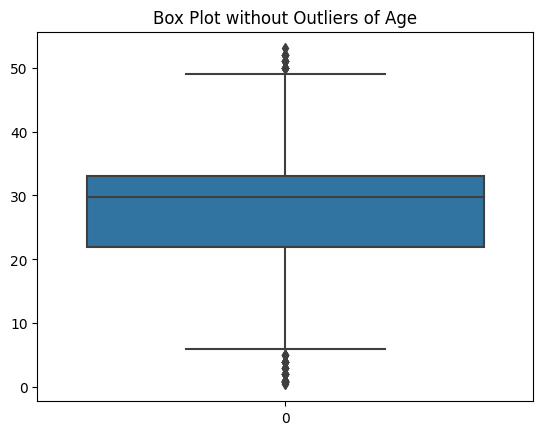

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [72]:
df1=removal_box_plot(df, 'Age', 53)
df1

The decision to remove outliers depends on various factors, including the objectives of the analysis, the nature of the data, and the impact of outliers on statistical measures and model assumptions. It's essential to carefully assess each case and consider domain knowledge before deciding whether to remove outliers or not

Like in this case, there are looking so many outliers present in dataset but actually they are not the outliers, it's a real data just signifies that most people are from age 20-40. So, in these cases we don't have to remove outliers as they are mathematically outliers but not actually outliers.

In [73]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


### ii) Using Scatterplot
It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables

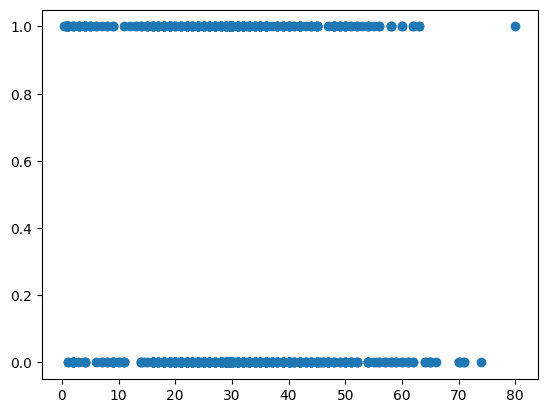

In [74]:
plt.scatter(df["Age"],df["Survived"])
plt.show()

As we can clearly see this method is not that effective

### iii) Using Z-Score
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

Zscore = (data_point -mean) / std. deviation

In [75]:
from scipy import stats

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Age       891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Cabin     891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


#### Note: It doesn't work in columns that has missing values

In [77]:
df2 = df.dropna(subset=['Age'])
df2

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [78]:
df2.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,29.699118,0.771044
std,0.486592,0.836071,1.102743,0.806057,49.693429,13.002015,0.420397
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,22.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,29.699118,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,35.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000


In [79]:
z = np.abs(stats.zscore(df2['Age']))
print(z)

0      0.592481
1      0.638789
2      0.284663
3      0.407926
4      0.407926
         ...   
886    0.207709
887    0.823344
888    0.000000
889    0.284663
890    0.177063
Name: Age, Length: 891, dtype: float64


In [80]:
threshold_z = 2.5
 
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (891, 9)
DataFrame Shape after Removing Outliers: (876, 9)


We can set any threshold and can remove those outliers that are far from z-score far than defined threshold

### iv) Inter Quartile Range
IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1

In [81]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [82]:
# IQR
Q1 = np.percentile(df2['Age'], 25, method='midpoint')
print("Q1 is:",Q1)
Q3 = np.percentile(df2['Age'], 75, method='midpoint')
print("Q3 is:",Q3)
IQR = Q3 - Q1
print("IQR is:",IQR)

Q1 is: 22.0
Q3 is: 35.0
IQR is: 13.0


Here, Q1 is 25 Percentile and Q3 is 75 percentile

So, IQR tells us about the range where 50% of the data lies

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

In [83]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

We define upper and lower as 1.5 times above Q3 and 1.5 times lower than Q1, these are called whiskers

Now, Data points outside these whiskers are considered as outliers

In [84]:
# Above Upper bound
upper_array = np.array(df2['Age'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
# Below Lower bound
lower_array = np.array(df2['Age'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 54.5
42
Lower Bound: 2.5
24


It tells the count of data points that are outliers

In [85]:
print("Old Shape: ", df2.shape)
# Removing the outliers
# Remove outliers and assign the modified DataFrame to df3
df3 = df2[~(upper_array | lower_array)]

# Print the new shape of the DataFrame
print("New Shape:", df3.shape)

Old Shape:  (891, 9)
New Shape: (825, 9)


We removed the data points that are outside the upper array and lower array

#### IQR method is the best method to remove outliers

#### Conclusion:
In conclusion, Visualization tools like box plots and scatter plots aid in identifying outliers, and mathematical methods such as Z-scores and Inter Quartile Range (IQR) offer robust approaches.

In [86]:
df3

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


Survived


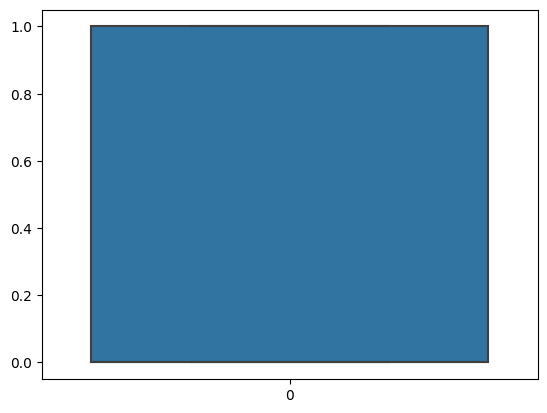

Pclass


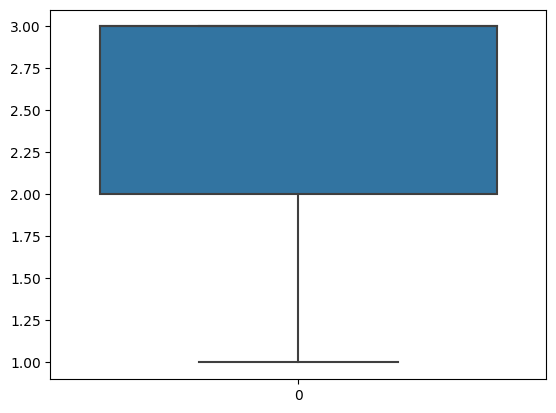

Age


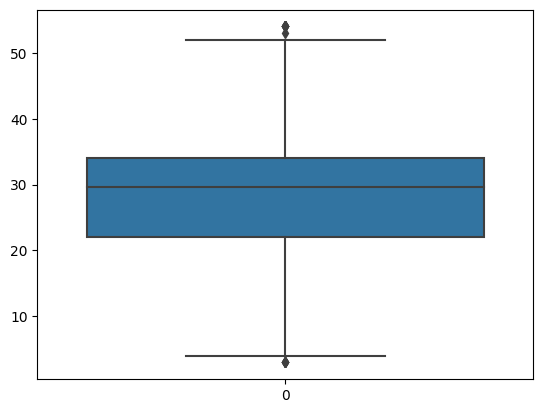

SibSp


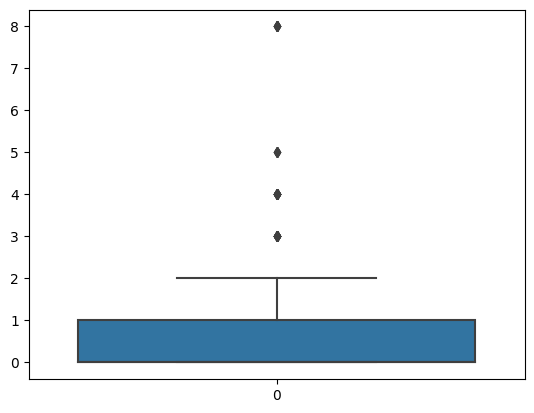

Parch


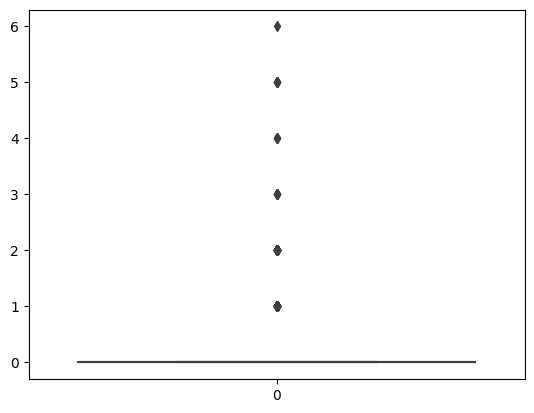

Fare


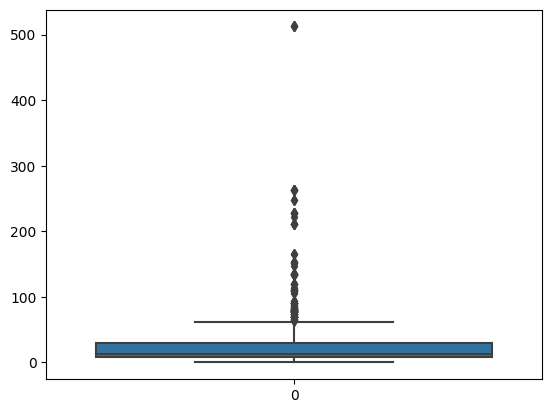

In [87]:
for col in num_cols:
    print(col)
    sns.boxplot(df3[col])
    plt.show()

But as already told,

The decision to remove outliers depends on various factors, including the objectives of the analysis, the nature of the data, and the impact of outliers on statistical measures and model assumptions. It's essential to carefully assess each case and consider domain knowledge before deciding whether to remove outliers or not

Like in this case, there are looking so many outliers present in dataset but actually they are not the outliers, it's a real data just signifies that most people are from age 20-40. So, in these cases we don't have to remove outliers as they are mathematically outliers but not actually outliers.

#### So, we will not remove any outlier from this dataset

## 6.3) Data Encoding
It is the process of converting categorical data into numerical data.

Data encoding can also involve transforming other types of data, such as text or images, into a format that is suitable for machine learning algorithms. For example, text data may be encoded into numerical vectors using techniques like word embeddings, while image data may be encoded into numerical arrays of pixel values.

#### Why Data encoding is required?
Categorical data can't be directly used as input for most machine learning algorithms because they require numerical data. Data encoding techniques transform categorical data into numerical representations that algorithms can understand and process. This conversion is crucial because it enables machine learning models to learn patterns and relationships in the data.

#### Types of Categorical columns:
Categorical features are generally divided into 3 types:
- Binary: yes/no
- Ordinal: low,med,high
- Nominal: cat,dog,rat,lion

### Techniques of Data Encoding:
There are various data encoding techniques in machine learning, each serving different purposes based on the nature of the data and the requirements of the model. Some common encoding techniques include:
1. Label Encoding: Assigns a unique integer to each category in a categorical variable.
2. One-Hot Encoding: Converts categorical variables into binary vectors where each category becomes a binary feature.
3. Frequency Encoding: Replaces categorical values with their frequency of occurrence in the dataset.
4. Ordinal Encoding: Similar to label encoding but preserves the order of categories if it exists.
5. Binary Encoding: Encodes categorical variables as binary numbers.
6. Hashing Encoding: Converts categorical variables into a fixed-length vector using hashing functions.
7. Target Encoding (Mean Encoding): Replaces categorical values with the mean of the target variable for each category.
8. Dummy Encoding: Similar to one-hot encoding

These techniques can be applied based on the type of data, the characteristics of the features, and the requirements of the machine learning model being used. Each has its strengths and weaknesses, and the choice of encoding method depends on factors like the dataset size, the cardinality of categorical variables, and the algorithm being employed.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Age       891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Cabin     891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [89]:
cat_cols

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [90]:
type(cat_cols)

pandas.core.indexes.base.Index

In [91]:
cat_cols = cat_cols.drop('Cabin')

In [92]:
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

- Sex is a binary categorical column
- Embarked is a nominal categorical column

Sex


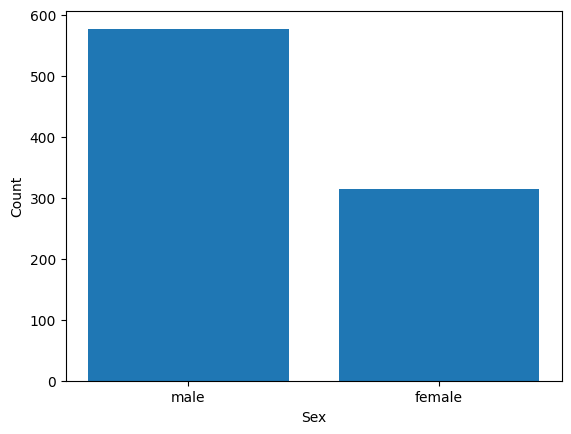

Embarked


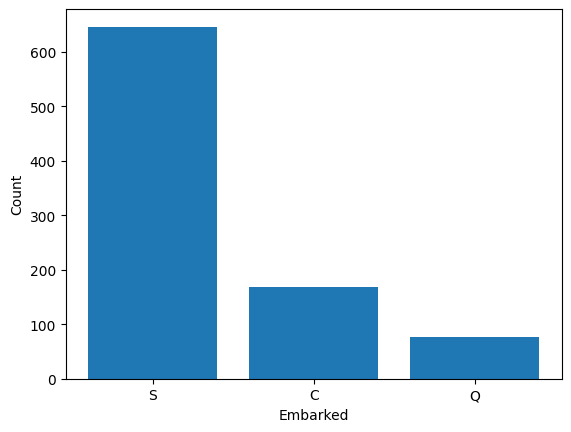

In [93]:
# For categorical columns
for col in cat_cols:
    print(col)
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### 1) Label Encoding
Label encoding is a technique used to convert categorical data into numerical data. In label encoding, each unique category is assigned a unique integer label. This technique is useful when there is some inherent order or ranking among the categories.
- Label encoding is generally used for encoding ordinal data. 
- In label encoding, the categories are typically encoded lexiographically, i.e, in alphabateical order but we can change order also according to our need

In [94]:
df1=df.copy()

In [95]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder  

In [96]:
le = LabelEncoder()

In [97]:
# Apply label encoding to the 'Sex' column
df1['Sex_encoded'] = le.fit_transform(df1['Sex'])

# Print the first few rows to verify the encoding
print(df1[['Sex', 'Sex_encoded']].head())

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


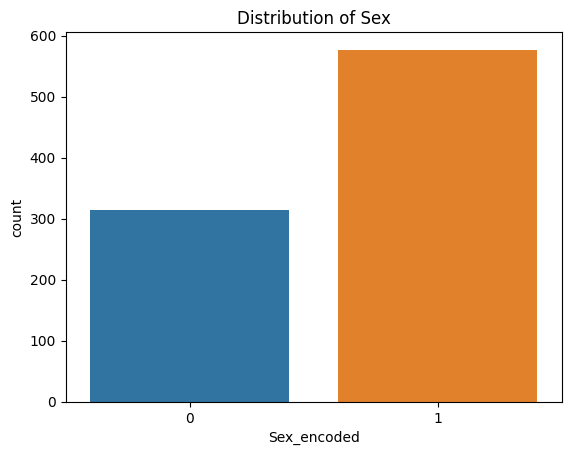

In [98]:
sns.countplot(x='Sex_encoded', data=df1)
plt.title('Distribution of Sex')
plt.show()

In [99]:
df1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,Sex_encoded
0,0,3,male,1,0,7.2500,22.0,S,1,1
1,1,1,female,1,0,71.2833,38.0,C,0,0
2,1,3,female,0,0,7.9250,26.0,S,1,0
3,1,1,female,1,0,53.1000,35.0,S,0,0
4,0,3,male,0,0,8.0500,35.0,S,1,1


Here, we can see female is encoded as 0 and male is encoded as 1

### One-hot encoding
In one-hot encoding, each category is represented by a binary vector where each element corresponds to one category, and only one element in the vector is 1 while the others are 0.

We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable.

Some properties of One-Hot encoding are:
- Preservation of Categorical Nature
- No Assumptions of Order
- Compatibility with Algorithms
- Interpretability
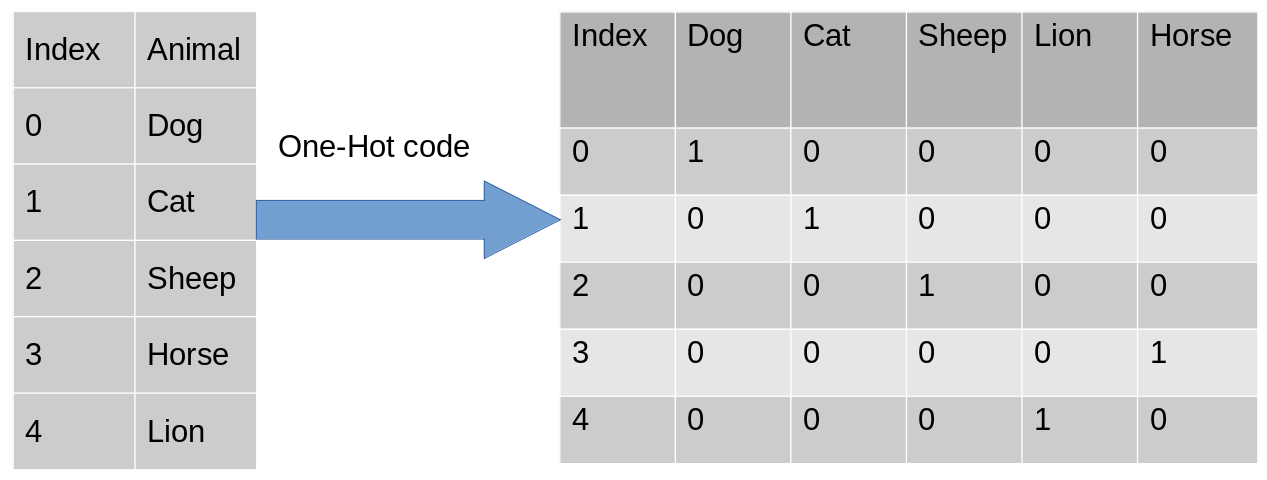

In [100]:
df2=df.copy()

In [101]:
one_hot_encoded = pd.get_dummies(df2['Embarked'])

In [102]:
one_hot_encoded

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [103]:
df_encoded = pd.concat([df2, one_hot_encoded], axis=1)

In [104]:
df_encoded

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,C,Q,S
0,0,3,male,1,0,7.2500,22.000000,S,1,False,False,True
1,1,1,female,1,0,71.2833,38.000000,C,0,True,False,False
2,1,3,female,0,0,7.9250,26.000000,S,1,False,False,True
3,1,1,female,1,0,53.1000,35.000000,S,0,False,False,True
4,0,3,male,0,0,8.0500,35.000000,S,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1,False,False,True
887,1,1,female,0,0,30.0000,19.000000,S,0,False,False,True
888,0,3,female,1,2,23.4500,29.699118,S,1,False,False,True
889,1,1,male,0,0,30.0000,26.000000,C,0,True,False,False


In [105]:
df_encoded.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age',
       'Embarked', 'Cabin', 'C', 'Q', 'S'],
      dtype='object')

In [106]:
boolean=["C","S","Q"]
df_encoded[boolean]=df_encoded[boolean].astype(int)

In [107]:
df_encoded

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,C,Q,S
0,0,3,male,1,0,7.2500,22.000000,S,1,0,0,1
1,1,1,female,1,0,71.2833,38.000000,C,0,1,0,0
2,1,3,female,0,0,7.9250,26.000000,S,1,0,0,1
3,1,1,female,1,0,53.1000,35.000000,S,0,0,0,1
4,0,3,male,0,0,8.0500,35.000000,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1,0,0,1
887,1,1,female,0,0,30.0000,19.000000,S,0,0,0,1
888,0,3,female,1,2,23.4500,29.699118,S,1,0,0,1
889,1,1,male,0,0,30.0000,26.000000,C,0,1,0,0


In [108]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [109]:
import category_encoders as ce

In [110]:
df2

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [111]:
encoder=ce.OneHotEncoder(cols='Embarked',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df2)
data_encoded

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_S,Embarked_C,Embarked_Q,Cabin
0,0,3,male,1,0,7.2500,22.000000,1.0,0.0,0.0,1
1,1,1,female,1,0,71.2833,38.000000,0.0,1.0,0.0,0
2,1,3,female,0,0,7.9250,26.000000,1.0,0.0,0.0,1
3,1,1,female,1,0,53.1000,35.000000,1.0,0.0,0.0,0
4,0,3,male,0,0,8.0500,35.000000,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,1.0,0.0,0.0,1
887,1,1,female,0,0,30.0000,19.000000,1.0,0.0,0.0,0
888,0,3,female,1,2,23.4500,29.699118,1.0,0.0,0.0,1
889,1,1,male,0,0,30.0000,26.000000,0.0,1.0,0.0,0


#### Note:
One-hot encoding approach eliminates the order but it causes the number of columns to expand vastly. So for columns with more unique values try using other techniques.

### Dummy Encoding
Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.
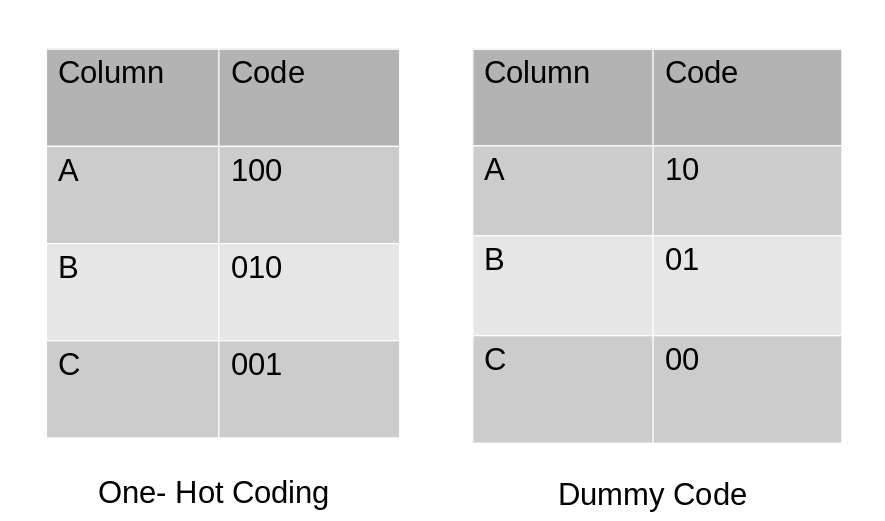

In [112]:
#encode the data
data_encoded_dummy=pd.get_dummies(data=df2,drop_first=True)
data_encoded_dummy

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.000000,1,True,False,True
1,1,1,1,0,71.2833,38.000000,0,False,False,False
2,1,3,0,0,7.9250,26.000000,1,False,False,True
3,1,1,1,0,53.1000,35.000000,0,False,False,True
4,0,3,0,0,8.0500,35.000000,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,1,True,False,True
887,1,1,0,0,30.0000,19.000000,0,False,False,True
888,0,3,1,2,23.4500,29.699118,1,False,False,True
889,1,1,0,0,30.0000,26.000000,0,True,False,False


In [113]:
x=["Sex_male","Embarked_Q","Embarked_S"]
data_encoded_dummy[x]=data_encoded_dummy[x].astype(int)
data_encoded_dummy

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.000000,1,1,0,1
1,1,1,1,0,71.2833,38.000000,0,0,0,0
2,1,3,0,0,7.9250,26.000000,1,0,0,1
3,1,1,1,0,53.1000,35.000000,0,0,0,1
4,0,3,0,0,8.0500,35.000000,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,1,1,0,1
887,1,1,0,0,30.0000,19.000000,0,0,0,1
888,0,3,1,2,23.4500,29.699118,1,0,0,1
889,1,1,0,0,30.0000,26.000000,0,1,0,0


In [114]:
data_encoded_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Age         891 non-null    float64
 6   Cabin       891 non-null    int32  
 7   Sex_male    891 non-null    int32  
 8   Embarked_Q  891 non-null    int32  
 9   Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


### Target Encoding / Mean Encoding
Target encoding is a technique used in machine learning and data preprocessing to transform categorical variables into numerical values. Unlike one-hot encoding, which creates binary columns for each category, target encoding calculates and assigns a numerical value to each category based on the relationship between the category and the target variable. Typically used for classification tasks, it replaces the categorical values with their corresponding mean (or other statistical measures) of the target variable within each category.

Target encoding can be effective in capturing valuable information from categorical data while reducing the dimensionality of the feature space, making it suitable for models like decision trees and gradient boosting.

Target encoding is a Baysian encoding technique.

Bayesian encoders use information from dependent/target variables to encode the categorical data.

In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category.

In [115]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [116]:
df3=df.copy()

In [117]:
# Calculate mean of target variable by 'Embarked' category
target_mean = df3.groupby('Embarked')['Survived'].mean()

# Replace categories with mean values
df3['Embarked_encoded'] = df3['Embarked'].map(target_mean)

# Print the DataFrame to verify the changes
print(df3[['Embarked', 'Embarked_encoded']])

    Embarked  Embarked_encoded
0          S          0.339009
1          C          0.553571
2          S          0.339009
3          S          0.339009
4          S          0.339009
..       ...               ...
886        S          0.339009
887        S          0.339009
888        S          0.339009
889        C          0.553571
890        Q          0.389610

[891 rows x 2 columns]


- The mean survival rate for passengers embarking from Southampton ('S') is approximately 0.339009.
- The mean survival rate for passengers embarking from Cherbourg ('C') is approximately 0.553571.
- The mean survival rate for passengers embarking from Queenstown ('Q') is approximately 0.389610.

These mean survival rates provide a numerical representation of the likelihood of survival for passengers from each port of embarkation, as inferred from the dataset.

#### Note:
The best encoding technique depends on your specific dataset, the characteristics of your categorical variables, and the requirements of your machine learning task. It's often a good idea to experiment with different encoding techniques and evaluate their performance using cross-validation or other validation methods.

##### Target Encoding is most widely used encoding technique in kaggle competitions.

Let' Summarise each encoding technique:
1. Label Encoding:
- Suitable for ordinal categorical variables where there's an inherent order or ranking among the categories.
- Efficient for binary categorical variables.
2. One-Hot Encoding:
- Suitable for nominal categorical variables where there's no inherent order among the categories.
- Preserves independence among categories.
- Compatible with a wide range of machine learning algorithms.
- Increases dimensionality, which can be an issue with high-cardinality variables.
3. Target Encoding (Mean Encoding):
- Utilizes target variable information, potentially improving predictive power.
- Effective for high-cardinality categorical variables.
- May lead to overfitting if not handled properly.
- Requires careful handling of smoothing techniques to prevent issues with low-frequency categories.
4. Frequency Encoding:
- Captures the frequency of occurrence of categories.
- Useful for categories with predictive power based on frequency.
- Can be sensitive to outliers or noise.
5. Ordinal Encoding:
- Preserves the order or ranking among categories.
- Suitable for ordinal categorical variables.
- May not be suitable for nominal categorical variables without inherent order.
6. Binary Encoding:
- Reduces dimensionality compared to one-hot encoding.
- Suitable for high-cardinality variables.
- Efficient for machine learning algorithms that can handle binary inputs.
7. Hashing Encoding:
- Converts categorical variables into fixed-length vectors, reducing memory usage.
- Useful for high-cardinality variables or when memory is a constraint.
- May lead to collisions, where different categories are mapped to the same hash value.
8. Dummy Encoding:
- Similar to one-hot encoding, but drops one of the binary features to avoid multicollinearity.
- Useful when you want to avoid the "dummy variable trap" in regression models.
- Creates 𝑘−1 binary features for k categories, where one category serves as the reference category.

In [118]:
df3

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,Embarked_encoded
0,0,3,male,1,0,7.2500,22.000000,S,1,0.339009
1,1,1,female,1,0,71.2833,38.000000,C,0,0.553571
2,1,3,female,0,0,7.9250,26.000000,S,1,0.339009
3,1,1,female,1,0,53.1000,35.000000,S,0,0.339009
4,0,3,male,0,0,8.0500,35.000000,S,1,0.339009
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1,0.339009
887,1,1,female,0,0,30.0000,19.000000,S,0,0.339009
888,0,3,female,1,2,23.4500,29.699118,S,1,0.339009
889,1,1,male,0,0,30.0000,26.000000,C,0,0.553571


In [119]:
# Apply label encoding to the 'Sex' column
df3['Sex_encoded'] = le.fit_transform(df1['Sex'])

# Print the first few rows to verify the encoding
print(df3[['Sex', 'Sex_encoded']].head())

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [120]:
df3

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,Embarked_encoded,Sex_encoded
0,0,3,male,1,0,7.2500,22.000000,S,1,0.339009,1
1,1,1,female,1,0,71.2833,38.000000,C,0,0.553571,0
2,1,3,female,0,0,7.9250,26.000000,S,1,0.339009,0
3,1,1,female,1,0,53.1000,35.000000,S,0,0.339009,0
4,0,3,male,0,0,8.0500,35.000000,S,1,0.339009,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1,0.339009,1
887,1,1,female,0,0,30.0000,19.000000,S,0,0.339009,0
888,0,3,female,1,2,23.4500,29.699118,S,1,0.339009,0
889,1,1,male,0,0,30.0000,26.000000,C,0,0.553571,1


In [121]:
df=df3.drop(["Sex","Embarked"],axis=1,inplace=True)

In [122]:
df3

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0,3,1,0,7.2500,22.000000,1,0.339009,1
1,1,1,1,0,71.2833,38.000000,0,0.553571,0
2,1,3,0,0,7.9250,26.000000,1,0.339009,0
3,1,1,1,0,53.1000,35.000000,0,0.339009,0
4,0,3,0,0,8.0500,35.000000,1,0.339009,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,1,0.339009,1
887,1,1,0,0,30.0000,19.000000,0,0.339009,0
888,0,3,1,2,23.4500,29.699118,1,0.339009,0
889,1,1,0,0,30.0000,26.000000,0,0.553571,1


In [123]:
df=df3

In [124]:
df

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0,3,1,0,7.2500,22.000000,1,0.339009,1
1,1,1,1,0,71.2833,38.000000,0,0.553571,0
2,1,3,0,0,7.9250,26.000000,1,0.339009,0
3,1,1,1,0,53.1000,35.000000,0,0.339009,0
4,0,3,0,0,8.0500,35.000000,1,0.339009,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,1,0.339009,1
887,1,1,0,0,30.0000,19.000000,0,0.339009,0
888,0,3,1,2,23.4500,29.699118,1,0.339009,0
889,1,1,0,0,30.0000,26.000000,0,0.553571,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   SibSp             891 non-null    int64  
 3   Parch             891 non-null    int64  
 4   Fare              891 non-null    float64
 5   Age               891 non-null    float64
 6   Cabin             891 non-null    int32  
 7   Embarked_encoded  891 non-null    float64
 8   Sex_encoded       891 non-null    int32  
dtypes: float64(3), int32(2), int64(4)
memory usage: 55.8 KB


##### Upto now, 
- Missing values are handled
- Outliers are removed
- Categorical data is encoded to numerical data

## Test-Train split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [129]:
x_train

,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
331,1,0,0,28.5000,45.500000,0,0.339009,1
733,2,0,0,13.0000,23.000000,1,0.339009,1
382,3,0,0,7.9250,32.000000,1,0.339009,1
704,3,1,0,7.8542,26.000000,1,0.339009,1
813,3,4,2,31.2750,6.000000,1,0.339009,0
...,...,...,...,...,...,...,...,...
106,3,0,0,7.6500,21.000000,1,0.339009,0
270,1,0,0,31.0000,29.699118,1,0.339009,1
860,3,2,0,14.1083,41.000000,1,0.339009,1
435,1,1,2,120.0000,14.000000,0,0.339009,0


In [130]:
x_test

,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
709,3,1,1,15.2458,29.699118,1,0.553571,1
439,2,0,0,10.5000,31.000000,1,0.339009,1
840,3,0,0,7.9250,20.000000,1,0.339009,1
720,2,0,1,33.0000,6.000000,1,0.339009,0
39,3,1,0,11.2417,14.000000,1,0.553571,0
...,...,...,...,...,...,...,...,...
433,3,0,0,7.1250,17.000000,1,0.339009,1
773,3,0,0,7.2250,29.699118,1,0.553571,1
25,3,1,5,31.3875,38.000000,1,0.339009,0
84,2,0,0,10.5000,17.000000,1,0.339009,0


In [131]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

# Feature Scaling
Feature Scaling is a critical step in building accurate and effective machine learning models. One key aspect of feature engineering is scaling, normalization, and standardization, which involves transforming the data to make it more suitable for modeling. These techniques can help to improve model performance, reduce the impact of outliers, and ensure that the data is on the same scale.

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

### Why use feature scaling?
1. Scaling guarantees that all features are on a comparable scale and have comparable ranges. This process is known as feature normalisation. This is significant because the magnitude of the features has an impact on many machine learning techniques. Larger scale features may dominate the learning process and have an excessive impact on the outcomes. You can avoid this problem and make sure that each feature contributes equally to the learning process by scaling the features.
2. Algorithm performance improvement: When the features are scaled, several machine learning methods, including gradient descent-based algorithms, distance-based algorithms (such k-nearest neighbours), and support vector machines, perform better or converge more quickly. The algorithm’s performance can be enhanced by scaling the features, which can hasten the convergence of the algorithm to the ideal outcome.
3. Preventing numerical instability: Numerical instability can be prevented by avoiding significant scale disparities between features. Examples include distance calculations or matrix operations, where having features with radically differing scales can result in numerical overflow or underflow problems. Stable computations are ensured and these issues are mitigated by scaling the features.
4. Scaling features makes ensuring that each characteristic is given the same consideration during the learning process. Without scaling, bigger scale features could dominate the learning, producing skewed outcomes. This bias is removed through scaling, which also guarantees that each feature contributes fairly to model predictions.

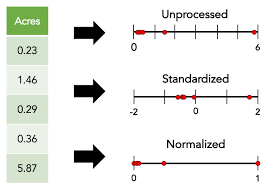

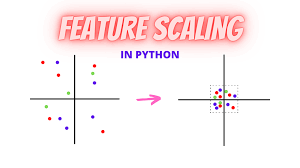

### Techniques to perform Feature Scaling:
1. Normalization(Min-Max Scaling)
2. standardization(Z-Score Normalization)
3. Max absolute scaling
4. Robust Scaling
5. Mean Normalization

## 1. Normalization
#### Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:
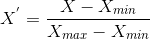

Here, Xmax and Xmin are the maximum and the minimum values of the feature, respectively.
- When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
- On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator, and thus the value of X’ is 1
- If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

##### So, Range of data after doing normalization is between 0 and 1

In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0.0,1.0,0.125,0.0,0.014151,0.271174,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.139136,0.472229,0.0,1.0,0.0
2,1.0,1.0,0.000,0.0,0.015469,0.321438,1.0,0.0,0.0
3,1.0,0.0,0.125,0.0,0.103644,0.434531,0.0,0.0,0.0
4,0.0,1.0,0.000,0.0,0.015713,0.434531,1.0,0.0,1.0


In [133]:
df

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0,3,1,0,7.2500,22.000000,1,0.339009,1
1,1,1,1,0,71.2833,38.000000,0,0.553571,0
2,1,3,0,0,7.9250,26.000000,1,0.339009,0
3,1,1,1,0,53.1000,35.000000,0,0.339009,0
4,0,3,0,0,8.0500,35.000000,1,0.339009,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,1,0.339009,1
887,1,1,0,0,30.0000,19.000000,0,0.339009,0
888,0,3,1,2,23.4500,29.699118,1,0.339009,0
889,1,1,0,0,30.0000,26.000000,0,0.553571,1


In [134]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,29.699118,0.771044,0.383838,0.647587
std,0.486592,0.836071,1.102743,0.806057,49.693429,13.002015,0.420397,0.083065,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.339009,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,22.000000,1.000000,0.339009,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,29.699118,1.000000,0.339009,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,35.000000,1.000000,0.389610,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000,0.553571,1.000000


## 2. Standardization
Standardization is another Feature scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:
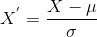

μ is the mean of the feature values and σ is the standard deviation of the feature values. Note that, in this case, the values are not restricted to a particular range.

In [135]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df_stsc = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df_stsc.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,-0.789272,0.827377,0.432793,-0.473674,-0.502445,-0.592481,0.544925,-0.539992,0.737695
1,1.266990,-1.566107,0.432793,-0.473674,0.786845,0.638789,-1.835115,2.044533,-1.355574
2,1.266990,0.827377,-0.474545,-0.473674,-0.488854,-0.284663,0.544925,-0.539992,-1.355574
3,1.266990,-1.566107,0.432793,-0.473674,0.420730,0.407926,-1.835115,-0.539992,-1.355574
4,-0.789272,0.827377,-0.474545,-0.473674,-0.486337,0.407926,0.544925,-0.539992,0.737695


## 3. Max Absolute Scaling
Max absolute scaling is a data scaling technique where each feature value is divided by the maximum absolute value across all features. This scales the data within the range [-1, 1] while maintaining the original distribution's shape. It's particularly useful when the distribution of your data is highly skewed or when you want to preserve the sign of the values.

Here’s the formula for Max absolute scaling:
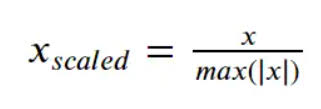

In [136]:
from sklearn.preprocessing import MaxAbsScaler

In [137]:
scaler = MaxAbsScaler()

In [138]:
scaled_data = scaler.fit_transform(df)
scaled_df_maxabs = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df_maxabs.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0.0,1.000000,0.125,0.0,0.014151,0.2750,1.0,0.612404,1.0
1,1.0,0.333333,0.125,0.0,0.139136,0.4750,0.0,1.000000,0.0
2,1.0,1.000000,0.000,0.0,0.015469,0.3250,1.0,0.612404,0.0
3,1.0,0.333333,0.125,0.0,0.103644,0.4375,0.0,0.612404,0.0
4,0.0,1.000000,0.000,0.0,0.015713,0.4375,1.0,0.612404,1.0


## 4. Robust Scaling:
Robust scaling, also known as robust standardization, is a method used to scale features by subtracting the median and then dividing by the interquartile range (IQR) rather than the standard deviation. This makes it robust to outliers in the data because it relies on the median and quartiles rather than the mean and standard deviation. It's beneficial when the data contains outliers or when the distribution is not Gaussian.

Formula for Robust Scaling:
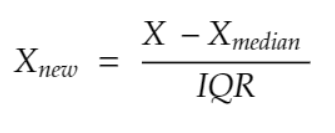

In [139]:
from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df_rs = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df_rs.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0.0,0.0,1.0,0.0,-0.312011,-0.592240,0.0,0.000000,0.0
1,1.0,-2.0,1.0,0.0,2.461242,0.638529,-1.0,4.240266,-1.0
2,1.0,0.0,0.0,0.0,-0.282777,-0.284548,0.0,0.000000,-1.0
3,1.0,-2.0,1.0,0.0,1.673732,0.407760,-1.0,0.000000,-1.0
4,0.0,0.0,0.0,0.0,-0.277363,0.407760,0.0,0.000000,0.0


In [140]:
# IQR
Q1 = np.percentile(df['Fare'], 25, method='midpoint')
print("Q1 is:",Q1)
Q2 = np.percentile(df['Fare'], 50, method='midpoint')
print("Q2 is:",Q2)
Q3 = np.percentile(df['Fare'], 75, method='midpoint')
print("Q3 is:",Q3)
IQR = Q3 - Q1
print("IQR is:",IQR)

Q1 is: 7.9104
Q2 is: 14.4542
Q3 is: 31.0
IQR is: 23.0896


#### Robust Scaling is generally used when we have outliers present in our dataset

## 5. Mean Normalization:
Mean Normalization centers the data around zero and scales it based on the range of values, typically resulting in a distribution with a mean of zero and a similar spread of values. It's useful for algorithms that assume zero-centered data or for comparing features with different units and scales.

Its formula is:
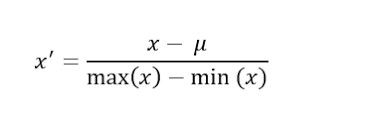

In [141]:
from sklearn.preprocessing import Normalizer
 
scaler = Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df_mn = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df_mn.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0.000000,0.128075,0.042692,0.0,0.309513,0.939213,0.042692,0.014473,0.042692
1,0.012376,0.012376,0.012376,0.0,0.882221,0.470298,0.000000,0.006851,0.000000
2,0.036517,0.109550,0.000000,0.0,0.289395,0.949436,0.036517,0.012380,0.000000
3,0.015718,0.015718,0.015718,0.0,0.834620,0.550126,0.000000,0.005329,0.000000
4,0.000000,0.083176,0.000000,0.0,0.223188,0.970383,0.027725,0.009399,0.027725


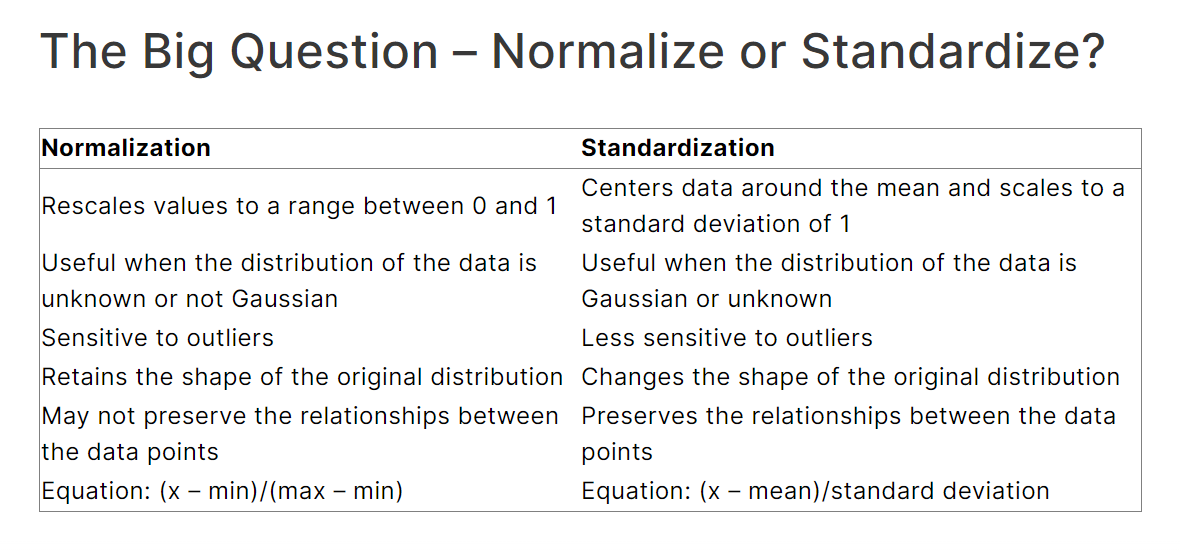

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized, and standardized data and comparing the performance for the best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

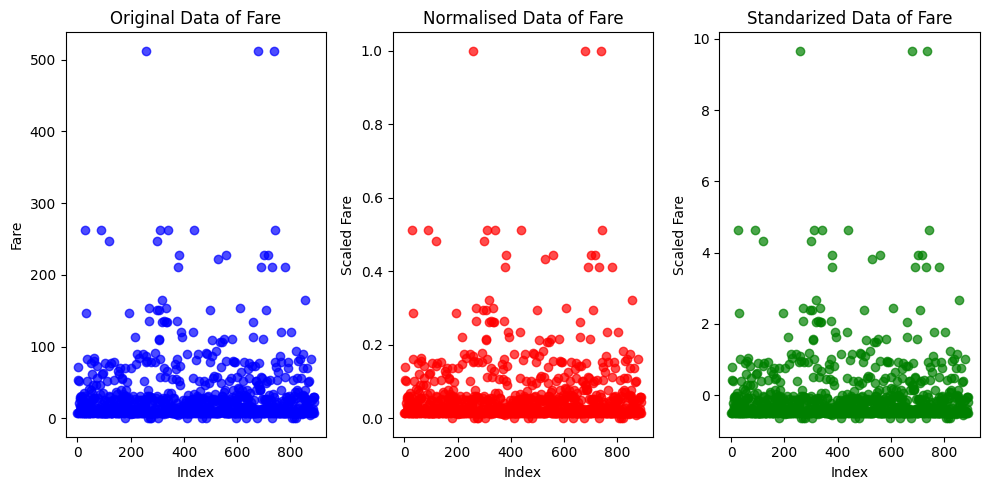

In [142]:
# Plot the scatter plot for original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(df.index, df['Fare'], color='blue', alpha=0.7)
plt.title('Original Data of Fare')
plt.xlabel('Index')
plt.ylabel('Fare')

# Plot the scatter plot for scaled data
plt.subplot(1, 3, 2)
plt.scatter(scaled_df.index, scaled_df['Fare'], color='red', alpha=0.7)
plt.title('Normalised Data of Fare')
plt.xlabel('Index')
plt.ylabel('Scaled Fare')

# Plot the scatter plot for scaled data
plt.subplot(1, 3, 3)
plt.scatter(scaled_df_stsc.index, scaled_df_stsc['Fare'], color='green', alpha=0.7)
plt.title('Standarized Data of Fare')
plt.xlabel('Index')
plt.ylabel('Scaled Fare')


plt.tight_layout()
plt.show()

## Feature Transformation
Most machine learning algorithms are statistics dependent, meaning that all of the algorithms are indirectly using a statistical approach to solve the complex problems in the data. In statistics, the normal distribution of the data is one that a statistician desires to be. A normal distribution of the data helps statisticians to solve the complex patterns of the data and gain valuable insights from the same. But for the algorithm scenario, a normal distribution of the data can not be desired every time with every type of dataset, which means the data which is not normally distributed needs preprocessing and cleaning before applying the machine learning algorithm to it.

There are 3 types of Feature transformation techniques:

- **Function Transformers**
  - **Description**: This involves applying mathematical functions (e.g., logarithmic, exponential, trigonometric) to transform features.
  - **Purpose**: To stabilize variance, make the data more normally distributed, or linearize relationships between variables.
  - **Example**: Taking the logarithm of positively skewed data to reduce skewness.

- **Power Transformers**
  - **Description**: This technique applies a power function (e.g., square root, cube root, Box-Cox, Yeo-Johnson) to the data.
  - **Purpose**: To stabilize variance, make the data more normal-like, and improve the validity of statistical inference.
  - **Example**: Box-Cox transformation, which can be used to transform non-normal dependent variables into a normal shape.

- **Quantile Transformers**
  - **Description**: This technique transforms the features to follow a particular distribution, often a uniform or normal distribution, by mapping the quantiles of the original data to the quantiles of the target distribution.
  - **Purpose**: To smooth out irregular distributions and make them more uniform or normally distributed.
  - **Example**: QuantileTransformer in scikit-learn can transform data to follow a uniform distribution, improving the performance of algorithms sensitive to the distribution of data.
mers

### Log transformation
Log transform is one of the simplest transformations on the data in which the log is applied to every single distribution of the data and the result from the log is considered the final day to feed the machine learning algorithms.

Through experiments, it is proven that log transforms performs so well on the right-skewed data. It transforms the right-skewed data into normally distributed data so well.

In [143]:
df1=df.copy()

In [144]:
df1

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0,3,1,0,7.2500,22.000000,1,0.339009,1
1,1,1,1,0,71.2833,38.000000,0,0.553571,0
2,1,3,0,0,7.9250,26.000000,1,0.339009,0
3,1,1,1,0,53.1000,35.000000,0,0.339009,0
4,0,3,0,0,8.0500,35.000000,1,0.339009,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,1,0.339009,1
887,1,1,0,0,30.0000,19.000000,0,0.339009,0
888,0,3,1,2,23.4500,29.699118,1,0.339009,0
889,1,1,0,0,30.0000,26.000000,0,0.553571,1


In [145]:
from sklearn.preprocessing import FunctionTransformer 

In [146]:
transform = FunctionTransformer(func=np.log1p) 
transformed_data = transform.fit_transform(df1) 

In [147]:
transformed_data

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0.000000,1.386294,0.693147,0.000000,2.110213,3.135494,0.693147,0.291930,0.693147
1,0.693147,0.693147,0.693147,0.000000,4.280593,3.663562,0.000000,0.440556,0.000000
2,0.693147,1.386294,0.000000,0.000000,2.188856,3.295837,0.693147,0.291930,0.000000
3,0.693147,0.693147,0.693147,0.000000,3.990834,3.583519,0.000000,0.291930,0.000000
4,0.000000,1.386294,0.000000,0.000000,2.202765,3.583519,0.693147,0.291930,0.693147
...,...,...,...,...,...,...,...,...,...
886,0.000000,1.098612,0.000000,0.000000,2.639057,3.332205,0.693147,0.291930,0.693147
887,0.693147,0.693147,0.000000,0.000000,3.433987,2.995732,0.000000,0.291930,0.000000
888,0.000000,1.386294,0.693147,1.098612,3.196630,3.424234,0.693147,0.291930,0.000000
889,0.693147,0.693147,0.000000,0.000000,3.433987,3.295837,0.000000,0.440556,0.693147


FunctionTransformer: This is a class in scikit-learn that allows you to create a transformer from an arbitrary function. It's useful for integrating custom transformations into scikit-learn's pipeline and preprocessing frameworks.

func=np.log1p: The func parameter specifies the function to be applied. np.log1p is a NumPy function that computes the natural logarithm of one plus the input array, element-wise. Mathematically, it performs:

#### log(1+𝑥)

This is particularly useful for handling data that contains zero values, as log(1+0)=0 is defined, whereas 
log(0) is not.

##### Why Use np.log1p?
Using np.log1p instead of np.log helps to handle cases where the data contains zero or very small positive values, which would otherwise cause issues with the standard logarithm function:

#### Benefits of Using `np.log1p`

- **Avoiding Undefined Logarithms**:
  - \(\log(0)\) is undefined, but \(\log(1 + 0) = 0\), so `np.log1p` avoids this problem.

- **Numerical Stability**:
  - For small values of \(x\), `np.log1p(x)` provides better numerical precision than \(\log(1 + x)\).


### Key Takeaways

- The feature transformation techniques are used to transform the data to a normal distribution for better performance of the algorithm.
- The Log transform performs well on right-skewed data, whereas the square root transform performs well on left-skewed data.
- Based on the domain knowledge of the problem statement and the data, custom data transformation techniques can also be applied efficiently.
- Box-Cox transformations can be applied only to positive data observations and return transformed values between -5 to 5.
- Yeo-Johnson’s transformation technique can be applied to zero and negative values aswell.
well.

## Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
LR=LogisticRegression()

In [150]:
LR.fit(x_train,y_train)

C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
y_pred=LR.predict(x_test)

In [152]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

## Evaluation Metrcies
In Machine Learning, only developing an ML model is not sufficient as we also need to see whether it is performing well or not. It means that after building an ML model, we need to evaluate and validate how good or bad it is, and for such cases, we use different Evaluation Metrics

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### 1. Accuracy

In [154]:
accuracy_score(y_pred,y_test)

0.8156424581005587

In [155]:
y_test.value_counts

<bound method IndexOpsMixin.value_counts of 709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64>

In [156]:
type(y_test)

pandas.core.series.Series

In [157]:
# Count values in y_test
count_y_test = y_test.value_counts()
count_y_test_zeros = count_y_test.get(0, 0)
count_y_test_ones = count_y_test.get(1, 0)

print(f'y_test: Number of zeros: {count_y_test_zeros}, Number of ones: {count_y_test_ones}')

y_test: Number of zeros: 105, Number of ones: 74


In [158]:
# Count values in y_pred
count_y_pred_zeros = np.sum(y_pred == 0)
count_y_pred_ones = np.sum(y_pred == 1)

print(f'y_pred: Number of zeros: {count_y_pred_zeros}, Number of ones: {count_y_pred_ones}')

y_pred: Number of zeros: 108, Number of ones: 71


In [159]:
cm = confusion_matrix(y_test, y_pred)

In [160]:
cm

array([[90, 15],
       [18, 56]], dtype=int64)

In [161]:
precision_score(y_test,y_pred)

0.7887323943661971

In [162]:
recall_score(y_test,y_pred)

0.7567567567567568

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
DT=DecisionTreeClassifier()

In [165]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [166]:
y_pred_dt=DT.predict(x_test)

In [167]:
y_pred_dt

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [168]:
accuracy_score(y_pred_dt,y_test)

0.7821229050279329

In [169]:
recall_score(y_pred_dt,y_test)

0.7333333333333333

In [170]:
f1_score(y_test,y_pred)

0.7724137931034483

In [171]:
f1_score(y_test,y_pred_dt)

0.738255033557047

In [172]:
from sklearn.metrics import roc_curve, auc

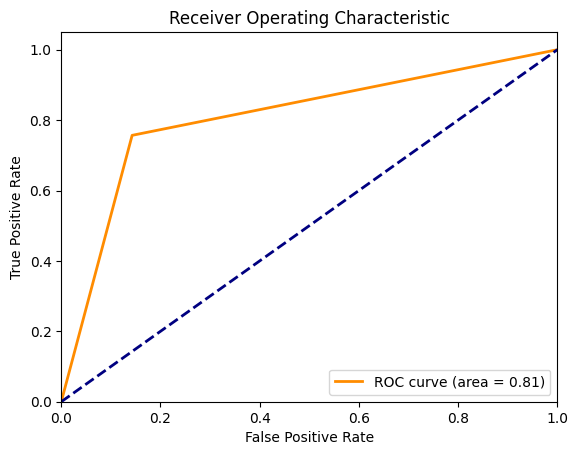

In [173]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [174]:
tpr

array([0.        , 0.75675676, 1.        ])

In [175]:
fpr

array([0.        , 0.14285714, 1.        ])

In [176]:
thresholds

array([inf,  1.,  0.])

In [177]:
roc_auc

0.806949806949807

<Axes: >

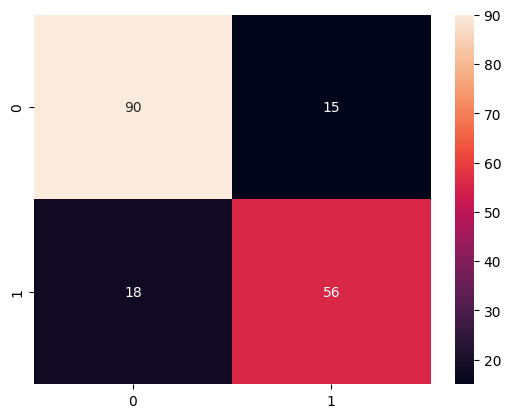

In [178]:
sns.heatmap(cm,annot=True)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.815642   0.788732  0.756757  0.772414
1       Decision Trees  0.782123   0.733333  0.743243  0.738255


C:\Users\Sarthak Aggarwal\AppData\Local\Temp\ipykernel_13060\2198616083.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_comparison = pd.concat([model_comparison, pd.DataFrame({


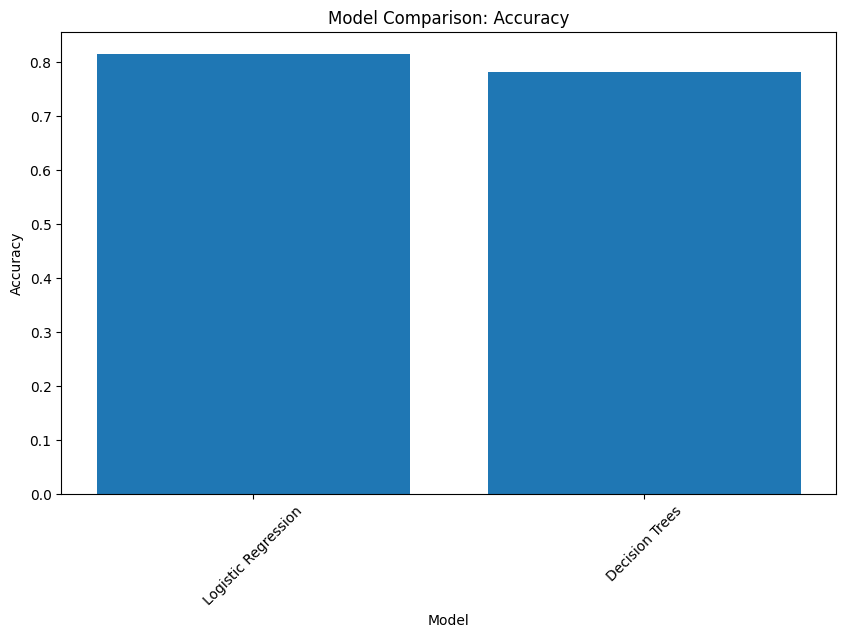

In [179]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
import matplotlib.pyplot as plt

# Create a DataFrame for model comparison
model_comparison = pd.DataFrame(columns=['Model', 'Accuracy','Precision', 'Recall', 'F1 Score'])

# Logistic Regression
accuracy_lr = accuracy_score(y_test,y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_lr],
    'Precision': [precision_lr],
    'Recall': [recall_lr],
    'F1 Score': [f1_lr]
})], ignore_index=True)

# Decision Trees
accuracy_dt = accuracy_score(y_test,y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['Decision Trees'],
    'Accuracy': [accuracy_dt],
    'Precision': [precision_dt],
    'Recall': [recall_dt],
    'F1 Score': [f1_dt]
})], ignore_index=True)

# Sort the DataFrame by AUPRC
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)

# Print the model comparison table
print(model_comparison)

# Bar plot of AUPRC scores
plt.figure(figsize=(10, 6))
plt.bar(model_comparison['Model'], model_comparison['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.xticks(rotation=45)
plt.show()

In [180]:
import pickle

In [181]:
# # Save the model to a file
# filename = 'model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(LR, file)

In [182]:
x_train

,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
331,1,0,0,28.5000,45.500000,0,0.339009,1
733,2,0,0,13.0000,23.000000,1,0.339009,1
382,3,0,0,7.9250,32.000000,1,0.339009,1
704,3,1,0,7.8542,26.000000,1,0.339009,1
813,3,4,2,31.2750,6.000000,1,0.339009,0
...,...,...,...,...,...,...,...,...
106,3,0,0,7.6500,21.000000,1,0.339009,0
270,1,0,0,31.0000,29.699118,1,0.339009,1
860,3,2,0,14.1083,41.000000,1,0.339009,1
435,1,1,2,120.0000,14.000000,0,0.339009,0


In [183]:
x_train.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Cabin', 'Embarked_encoded',
       'Sex_encoded'],
      dtype='object')

In [185]:
Pclass = int(input("Pclass: "))
SibSp = int(input("SibSp: "))
Parch = int(input("Parch: "))
Fare = float(input("Fare: "))
Age = float(input("Age: "))
Cabin = int(input("Cabin (encoded): "))
Embarked_encoded = float(input("Embarked (encoded): "))
Sex_encoded = int(input("Sex (encoded): "))

test_input_data = {
    'Pclass': [Pclass],
    'SibSp': [SibSp],
    'Parch': [Parch],
    'Fare': [Fare],
    'Age': [Age],
    'Cabin': [Cabin], 
    'Embarked_encoded': [Embarked_encoded],
    'Sex_encoded': [Sex_encoded]
}

test_input_df = pd.DataFrame(test_input_data)

prediction = LR.predict(test_input_df)
prediction_proba = LR.predict_proba(test_input_df)

print("Prediction:", prediction[0])  # 0 or 1
print("Prediction Probability:", prediction_proba[0]) 

Pclass:  2
SibSp:  0
Parch:  0
Fare:  13.2
Age:  27.0
Cabin (encoded):  1
Embarked (encoded):  0.33
Sex (encoded):  1


Prediction: 0
Prediction Probability: [0.79682193 0.20317807]


In [184]:
df

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked_encoded,Sex_encoded
0,0,3,1,0,7.2500,22.000000,1,0.339009,1
1,1,1,1,0,71.2833,38.000000,0,0.553571,0
2,1,3,0,0,7.9250,26.000000,1,0.339009,0
3,1,1,1,0,53.1000,35.000000,0,0.339009,0
4,0,3,0,0,8.0500,35.000000,1,0.339009,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,1,0.339009,1
887,1,1,0,0,30.0000,19.000000,0,0.339009,0
888,0,3,1,2,23.4500,29.699118,1,0.339009,0
889,1,1,0,0,30.0000,26.000000,0,0.553571,1


In [186]:
Pclass = int(input("Pclass: "))
SibSp = int(input("SibSp: "))
Parch = int(input("Parch: "))
Fare = float(input("Fare: "))
Age = float(input("Age: "))
Cabin = int(input("Cabin (encoded): "))
Embarked_encoded = float(input("Embarked (encoded): "))
Sex_encoded = int(input("Sex (encoded): "))

test_input_data = {
    'Pclass': [Pclass],
    'SibSp': [SibSp],
    'Parch': [Parch],
    'Fare': [Fare],
    'Age': [Age],
    'Cabin': [Cabin], 
    'Embarked_encoded': [Embarked_encoded],
    'Sex_encoded': [Sex_encoded]
}

test_input_df = pd.DataFrame(test_input_data)

prediction = LR.predict(test_input_df)
prediction_proba = LR.predict_proba(test_input_df)

print("Prediction:", prediction[0])  # 0 or 1
print("Prediction Probability:", prediction_proba[0]) 

Pclass:  1
SibSp:  1
Parch:  0
Fare:  71.28
Age:  38.00
Cabin (encoded):  0
Embarked (encoded):  0.55
Sex (encoded):  0


Prediction: 1
Prediction Probability: [0.07676589 0.92323411]
